## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Train Data

## Loading Train Data

In [2]:
train_data = pd.read_csv("/kaggle/input/ccfd-dataset/train.csv")

In [3]:
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


#### Finding the day of the transaction

In [6]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [8]:
train_data["trans_day"] = train_data["trans_date_trans_time"].dt.dayofweek

In [9]:
train_data['trans_day'].describe()

count    1.296675e+06
mean     3.070604e+00
std      2.198153e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: trans_day, dtype: float64

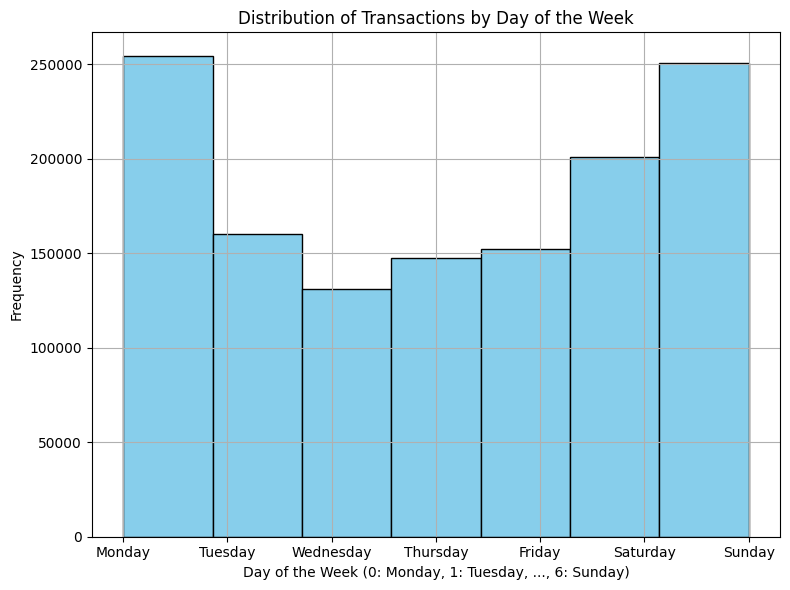

In [10]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(train_data['trans_day'], bins=7, color='skyblue', edgecolor='black')
plt.title('Distribution of Transactions by Day of the Week')
plt.xlabel('Day of the Week (0: Monday, 1: Tuesday, ..., 6: Sunday)')
plt.ylabel('Frequency')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.tight_layout()
plt.show()

#### Finding age using DOB

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [12]:
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['dob'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1296675 entries, 0 to 1296674
Series name: dob
Non-Null Count    Dtype         
--------------    -----         
1296675 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.9 MB


In [13]:
from datetime import datetime

def calculate_age(dob):
    # Get the current date
    current_date = datetime.now()
    
    # Calculate age
    age = current_date.year - dob.year - ((current_date.month, current_date.day) < (dob.month, dob.day))
    
    return age

In [14]:
train_data['age'] = train_data['dob'].apply(calculate_age)
train_data['age']

0          36
1          46
2          62
3          57
4          38
           ..
1296670    62
1296671    44
1296672    56
1296673    43
1296674    28
Name: age, Length: 1296675, dtype: int64

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [16]:
train_data['age'].value_counts()

age
39    42457
51    40418
52    39971
48    37883
38    35355
      ...  
92     2065
98     2026
86     1054
81     1043
99      536
Name: count, Length: 81, dtype: int64

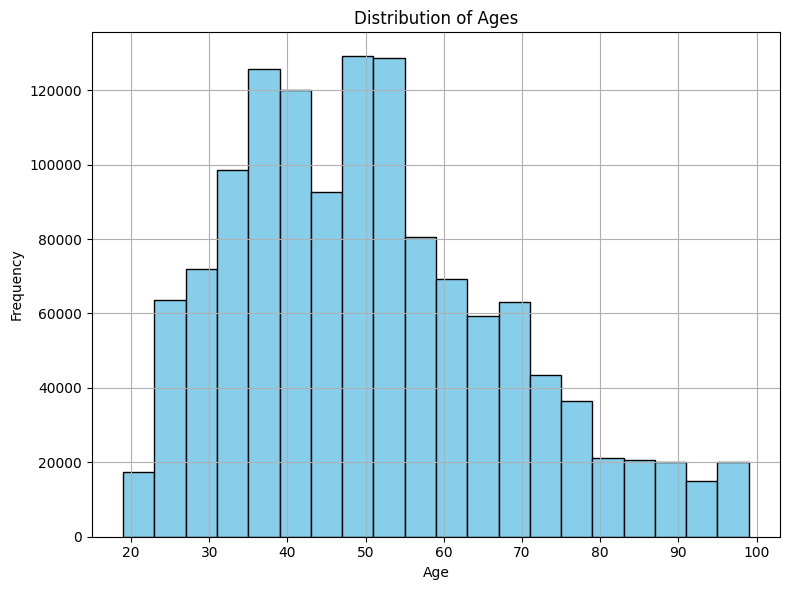

In [17]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(train_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Checking cities and state

In [18]:
train_data['street'].value_counts()

street
0069 Robin Brooks Apt. 695           3123
864 Reynolds Plains                  3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
                                     ... 
7281 Joshua Mills Apt. 077              7
3307 Ferguson Way                       7
9599 Washington Field Suite 238         7
3437 Ross Flat Apt. 592                 7
27954 Hall Mill Suite 575               7
Name: count, Length: 983, dtype: int64

In [19]:
train_data['city'].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

In [20]:
train_data['state'].value_counts().shape[0]

51

#### Removing irrelevant features

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [22]:
train_data.columns.tolist()

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'trans_day',
 'age']

In [23]:
selected_features = ['trans_day',
                     'cc_num',
                     'merchant',
                     'category',
                     'amt',
                     'gender',
                     'city',
                     'state',
                     'lat',
                     'long',
                     'city_pop',
                     'job',
                     'age',
                     'unix_time',
                     'merch_lat',
                     'merch_long',
                     'is_fraud',
]

In [24]:
train_data.shape[1]

25

In [25]:
df = train_data[selected_features].copy()

In [26]:
df

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long,is_fraud
0,1,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36,1325376018,36.011293,-82.048315,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,46,1325376044,49.159047,-118.186462,0
2,1,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,62,1325376051,43.150704,-112.154481,0
3,1,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,57,1325376076,47.034331,-112.561071,0
4,1,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,6,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,62,1371816728,36.841266,-111.690765,0
1296671,6,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",44,1371816739,38.906881,-78.246528,0
1296672,6,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,56,1371816752,33.619513,-105.130529,0
1296673,6,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,43,1371816816,42.788940,-103.241160,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_day   1296675 non-null  int32  
 1   cc_num      1296675 non-null  int64  
 2   merchant    1296675 non-null  object 
 3   category    1296675 non-null  object 
 4   amt         1296675 non-null  float64
 5   gender      1296675 non-null  object 
 6   city        1296675 non-null  object 
 7   state       1296675 non-null  object 
 8   lat         1296675 non-null  float64
 9   long        1296675 non-null  float64
 10  city_pop    1296675 non-null  int64  
 11  job         1296675 non-null  object 
 12  age         1296675 non-null  int64  
 13  unix_time   1296675 non-null  int64  
 14  merch_lat   1296675 non-null  float64
 15  merch_long  1296675 non-null  float64
 16  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int32(1), int64(5), object(6)
memory usage: 163.2+

In [28]:
# Converting the variables into 'Category' type
df['cc_num'] = df['cc_num'].astype('category')
df['merchant'] = df['merchant'].astype('category')
df['category'] = df['category'].astype('category')
df['gender'] = df['gender'].astype('category')
df['city'] = df['city'].astype('category')
df['state'] = df['state'].astype('category')
df['job'] = df['job'].astype('category')
df['is_fraud'] = df['is_fraud'].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   trans_day   1296675 non-null  int32   
 1   cc_num      1296675 non-null  category
 2   merchant    1296675 non-null  category
 3   category    1296675 non-null  category
 4   amt         1296675 non-null  float64 
 5   gender      1296675 non-null  category
 6   city        1296675 non-null  category
 7   state       1296675 non-null  category
 8   lat         1296675 non-null  float64 
 9   long        1296675 non-null  float64 
 10  city_pop    1296675 non-null  int64   
 11  job         1296675 non-null  category
 12  age         1296675 non-null  int64   
 13  unix_time   1296675 non-null  int64   
 14  merch_lat   1296675 non-null  float64 
 15  merch_long  1296675 non-null  float64 
 16  is_fraud    1296675 non-null  category
dtypes: category(8), float64(5), int32(1), int64(3)

In [30]:
df.head()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long,is_fraud
0,1,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36,1325376018,36.011293,-82.048315,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,46,1325376044,49.159047,-118.186462,0
2,1,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,62,1325376051,43.150704,-112.154481,0
3,1,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,57,1325376076,47.034331,-112.561071,0
4,1,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38,1325376186,38.674999,-78.632459,0


#### Using Label Encoder to convert Categorical variables into numerical features

In [31]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
# Select the categorical columns
cat_columns = df.select_dtypes(include=['category']).columns
cat_columns = cat_columns.drop('is_fraud')

# Initialize the LabelEncoder
label_encoders = {}

# Iterate over each categorical column
for col in cat_columns:
    # Initialize LabelEncoder for the column
    label_encoders[col] = LabelEncoder()
    
    # Fit LabelEncoder and transform the column
    df[col] = label_encoders[col].fit_transform(df[col])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   trans_day   1296675 non-null  int32   
 1   cc_num      1296675 non-null  int64   
 2   merchant    1296675 non-null  int64   
 3   category    1296675 non-null  int64   
 4   amt         1296675 non-null  float64 
 5   gender      1296675 non-null  int64   
 6   city        1296675 non-null  int64   
 7   state       1296675 non-null  int64   
 8   lat         1296675 non-null  float64 
 9   long        1296675 non-null  float64 
 10  city_pop    1296675 non-null  int64   
 11  job         1296675 non-null  int64   
 12  age         1296675 non-null  int64   
 13  unix_time   1296675 non-null  int64   
 14  merch_lat   1296675 non-null  float64 
 15  merch_long  1296675 non-null  float64 
 16  is_fraud    1296675 non-null  category
dtypes: category(1), float64(5), int32(1), int64(10

In [33]:
df.head()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long,is_fraud
0,1,444,514,8,4.97,0,526,27,36.0788,-81.1781,3495,370,36,1325376018,36.011293,-82.048315,0
1,1,42,241,4,107.23,0,612,47,48.8878,-118.2105,149,428,46,1325376044,49.159047,-118.186462,0
2,1,237,390,0,220.11,1,468,13,42.1808,-112.2620,4154,307,62,1325376051,43.150704,-112.154481,0
3,1,509,360,2,45.00,1,84,26,46.2306,-112.1138,1939,328,57,1325376076,47.034331,-112.561071,0
4,1,368,297,9,41.96,1,216,45,38.4207,-79.4629,99,116,38,1325376186,38.674999,-78.632459,0


## Exploratory Data Analysis

In [34]:
# Summary statistics
print(df.describe())

          trans_day        cc_num      merchant      category           amt  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   3.070604e+00  4.900549e+02  3.428585e+02  6.227787e+00  7.035104e+01   
std    2.198153e+00  2.815013e+02  2.009519e+02  3.913443e+00  1.603160e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    1.000000e+00  2.480000e+02  1.650000e+02  3.000000e+00  9.650000e+00   
50%    3.000000e+00  4.850000e+02  3.460000e+02  6.000000e+00  4.752000e+01   
75%    5.000000e+00  7.320000e+02  5.140000e+02  1.000000e+01  8.314000e+01   
max    6.000000e+00  9.820000e+02  6.920000e+02  1.300000e+01  2.894890e+04   

             gender          city         state           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.525513e-01  4.452633e+02  2.667728e+01  3.853762e+01 -9.022634e+01   
std    4.977437e-01  2.586001e+02  1.433098e+01  5.

<Figure size 1200x800 with 0 Axes>

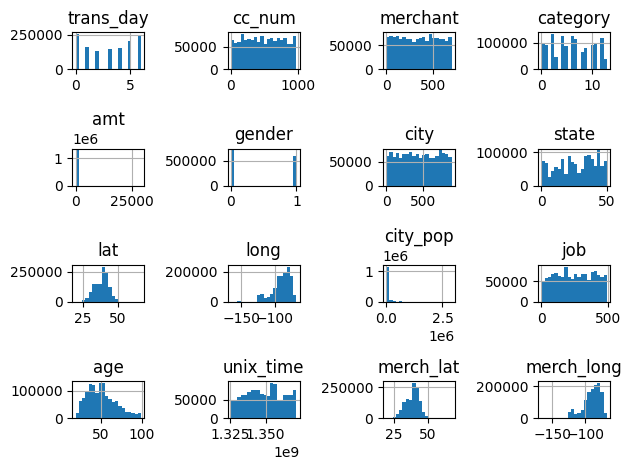

In [35]:
# Histograms
plt.figure(figsize=(12, 8))
df.hist(bins=20)
plt.tight_layout()
plt.show()

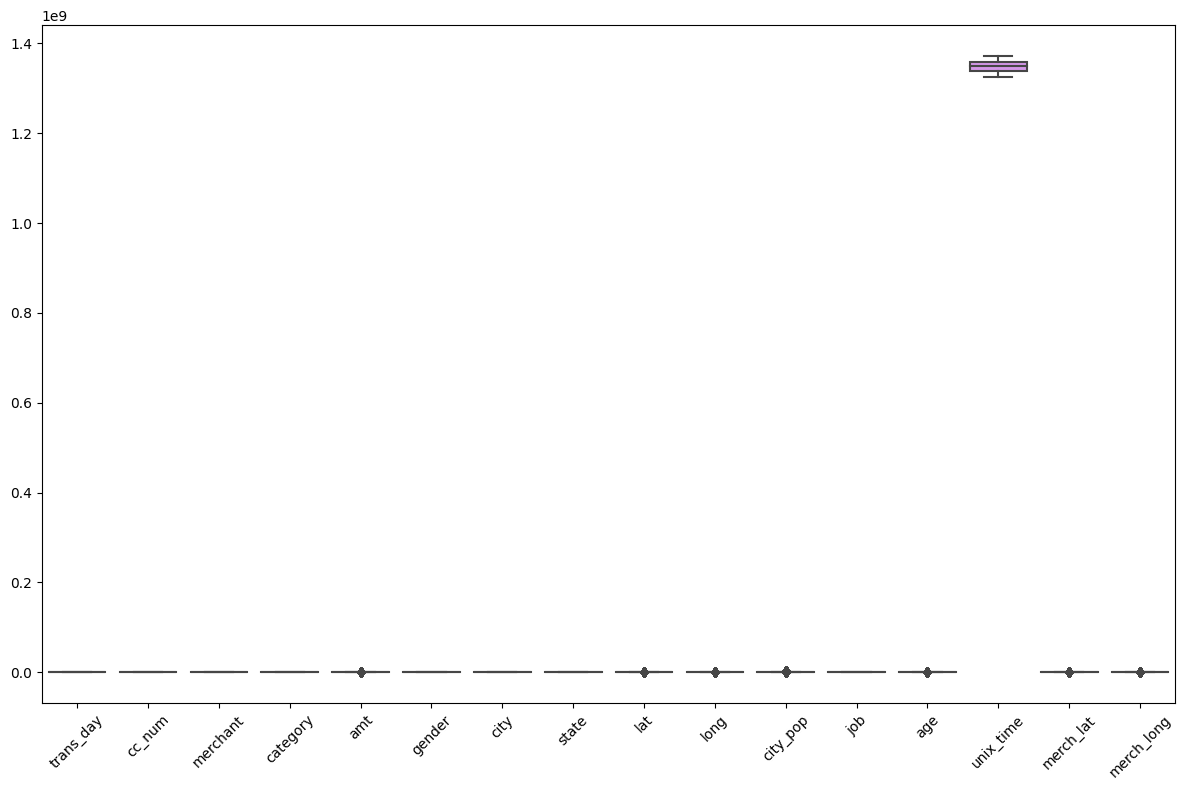

In [36]:
# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

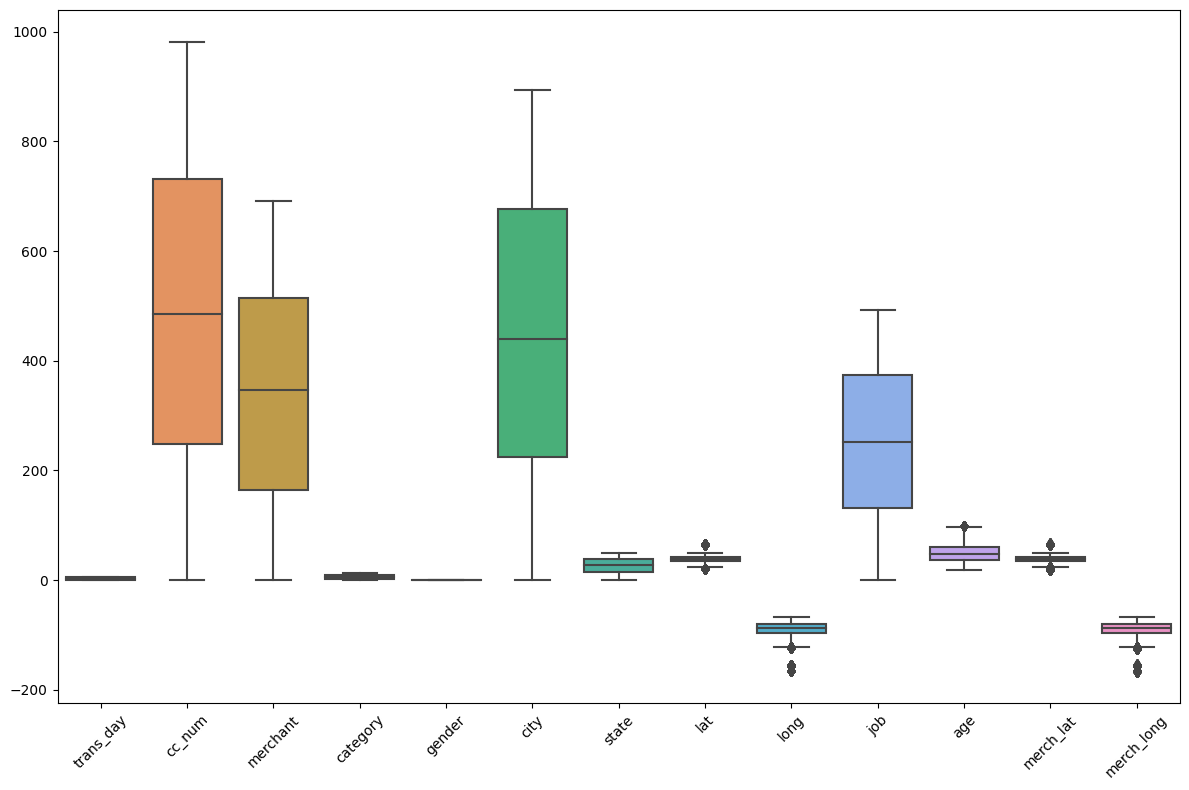

In [37]:
selected_cols = df.columns
selected_cols = selected_cols.drop(['unix_time', 'city_pop', 'amt'])

# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[selected_cols])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

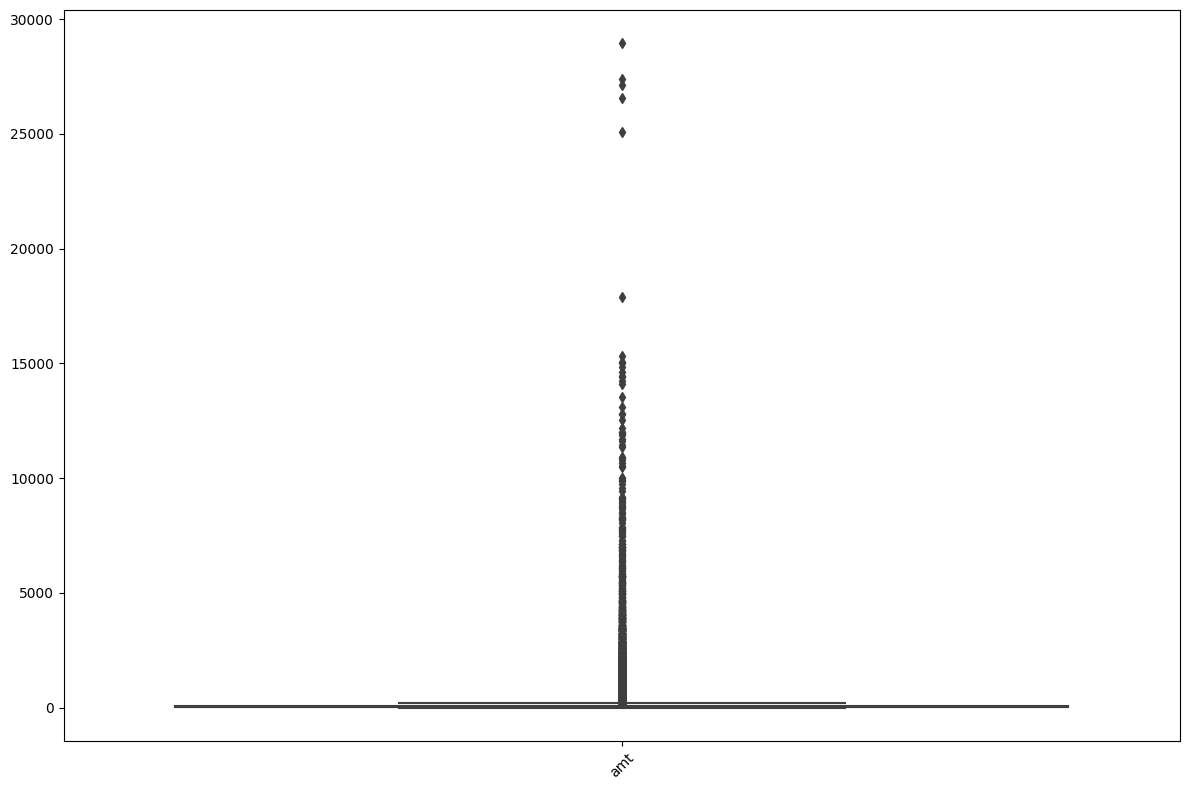

In [38]:
# Boxplot for 'amt' feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['amt']])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [40]:
df['amt'].value_counts()

amt
1.14       542
1.04       538
1.25       535
1.02       533
1.01       523
          ... 
334.21       1
674.31       1
358.59       1
1159.68      1
255.52       1
Name: count, Length: 52928, dtype: int64

In [41]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


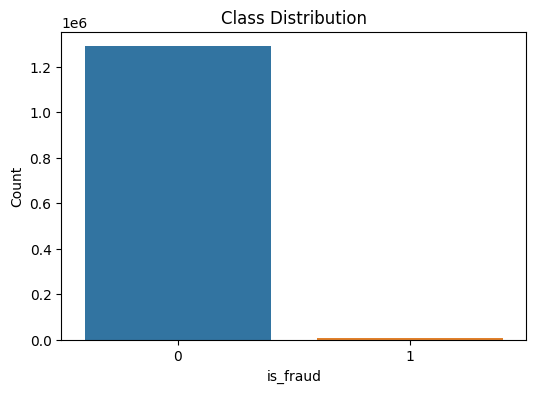

In [42]:
# Class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

#### Treating 'amt' feature

In [43]:
df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [44]:
print(df['amt'].value_counts().sort_index(ascending=False).iloc[:1000])

amt
28948.90    1
27390.12    1
27119.77    1
26544.12    1
25086.94    1
           ..
1686.30     1
1685.41     1
1685.13     1
1683.46     1
1682.88     1
Name: count, Length: 1000, dtype: int64


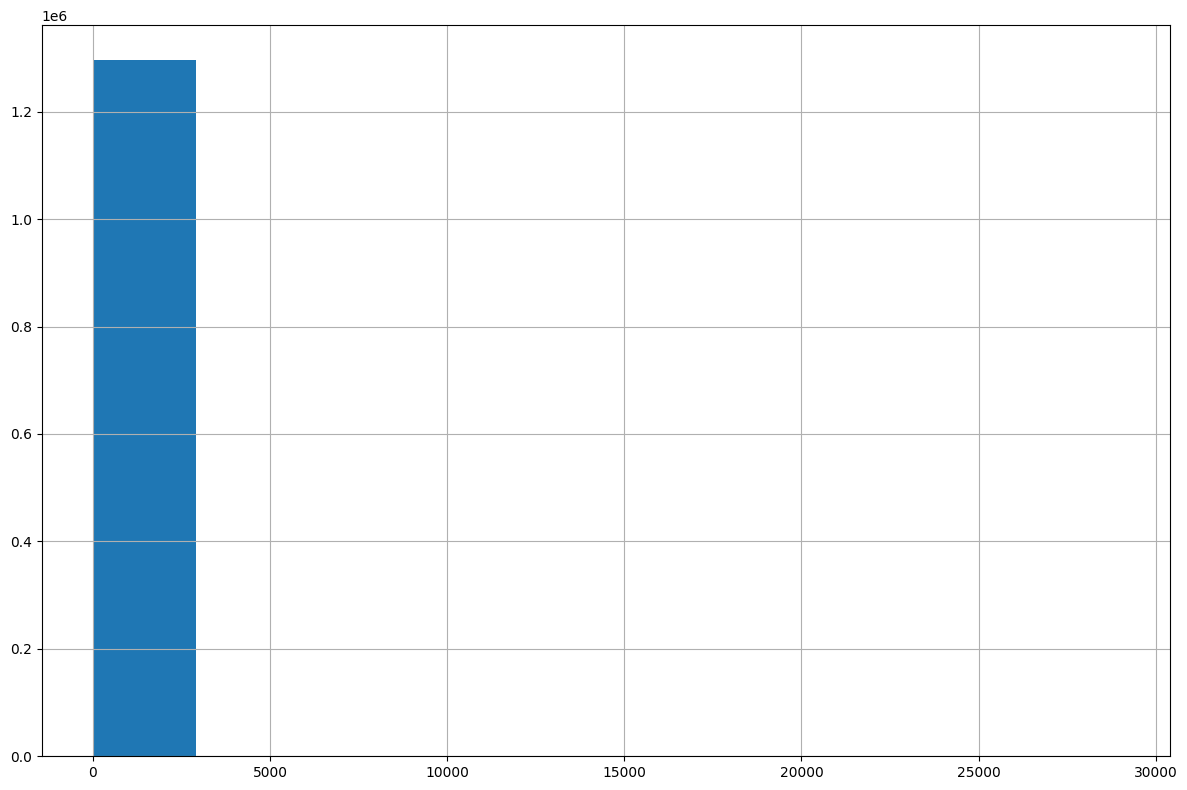

In [45]:
# Histograms
plt.figure(figsize=(12, 8))
df['amt'].hist(bins=10)
plt.tight_layout()
plt.show()

In [46]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]

# Print the outlier entries
print("Outliers in 'amt' column:")
print(outliers)

Outliers in 'amt' column:
         trans_day  cc_num  merchant  category     amt  gender  city  state  \
2                1     237       390         0  220.11       1   468     13   
9                1     453       563         4  198.39       0   149     42   
16               1     846       379         8  327.00       0   421     36   
17               1     572       409        12  341.67       1   123     15   
36               1     629       239         4  207.36       0    64     34   
...            ...     ...       ...       ...     ...     ...   ...    ...   
1296547          6     134        36         8  754.81       1   715     43   
1296557          6     136       349         8  374.71       0   491     16   
1296590          6     740       466         4  194.07       0   537     49   
1296603          6     978       320         0  255.52       1   111     45   
1296657          6     106       206         8  264.22       0   429      9   

             lat      lon

In [47]:
# Getting the count of outliers in 'amt' feature
outliers['amt'].value_counts().sort_index(ascending=False)

amt
28948.90     1
27390.12     1
27119.77     1
26544.12     1
25086.94     1
            ..
193.42       4
193.41      13
193.40       6
193.39      10
193.38      11
Name: count, Length: 33690, dtype: int64

In [48]:
# Getting the count of outliers in 'is_fraud' feature
outliers['is_fraud'].value_counts()

is_fraud
0    61585
1     5705
Name: count, dtype: int64

In [49]:
# Finding number of fraudulent cases in the outliers
fraud = outliers[outliers['is_fraud'] == 1]
fraud.shape

(5705, 17)

In [50]:
fraud['amt'].describe()

count    5705.000000
mean      691.139337
std       306.460349
min       197.330000
25%       326.040000
50%       786.400000
75%       948.050000
max      1376.040000
Name: amt, dtype: float64

#### Selecting Data samples with 'amt' less than 2000

In [51]:
df[df['is_fraud'] == 1]['amt'].describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [52]:
# bounds from quantiles of the IQR
lower_bound, upper_bound

(-100.58499999999998, 193.375)

In [53]:
# Creating our final data
treated_df = df[(df['amt'] > 1) & (df['amt'] <= 2000)]
treated_df.shape

(1295722, 17)

### Visualizing the treated data

In [54]:
treated_df.describe()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long
count,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06
mean,3.070746e+00,4.900540e+02,3.428564e+02,6.223951e+00,6.814126e+01,4.525531e-01,4.452667e+02,2.667724e+01,3.853799e+01,-9.022609e+01,8.881739e+04,2.511612e+02,5.023368e+01,1.349244e+09,3.853771e+01,-9.022623e+01
std,2.198135e+00,2.815028e+02,2.009576e+02,3.911875e+00,1.070357e+02,4.977439e-01,2.585986e+02,1.433082e+01,5.075704e+00,1.375888e+01,3.019441e+05,1.401106e+02,1.739536e+01,1.284129e+07,5.109697e+00,1.377090e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,0.000000e+00,1.900000e+01,1.325376e+09,1.902779e+01,-1.666712e+02
25%,1.000000e+00,2.480000e+02,1.650000e+02,3.000000e+00,9.650000e+00,0.000000e+00,2.240000e+02,1.500000e+01,3.466890e+01,-9.679800e+01,7.430000e+02,1.310000e+02,3.700000e+01,1.338751e+09,3.473418e+01,-9.689695e+01
50%,3.000000e+00,4.850000e+02,3.460000e+02,6.000000e+00,4.749000e+01,0.000000e+00,4.390000e+02,2.800000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,2.510000e+02,4.800000e+01,1.349250e+09,3.936612e+01,-8.743859e+01
75%,5.000000e+00,7.320000e+02,5.140000e+02,1.000000e+01,8.306000e+01,1.000000e+00,6.770000e+02,3.800000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,3.740000e+02,6.100000e+01,1.359386e+09,4.195734e+01,-8.023695e+01
max,6.000000e+00,9.820000e+02,6.920000e+02,1.300000e+01,1.999200e+03,1.000000e+00,8.930000e+02,5.000000e+01,6.669330e+01,-6.795030e+01,2.906700e+06,4.930000e+02,9.900000e+01,1.371817e+09,6.751027e+01,-6.695090e+01


<Figure size 1200x800 with 0 Axes>

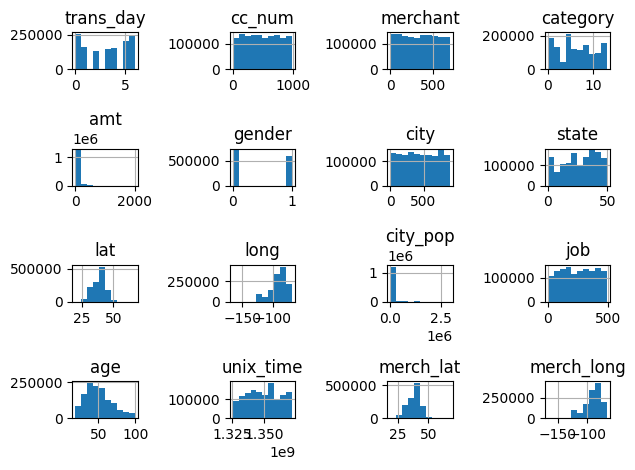

In [55]:
# Histograms
plt.figure(figsize=(12, 8))
treated_df.hist(bins=10)
plt.tight_layout()
plt.show()

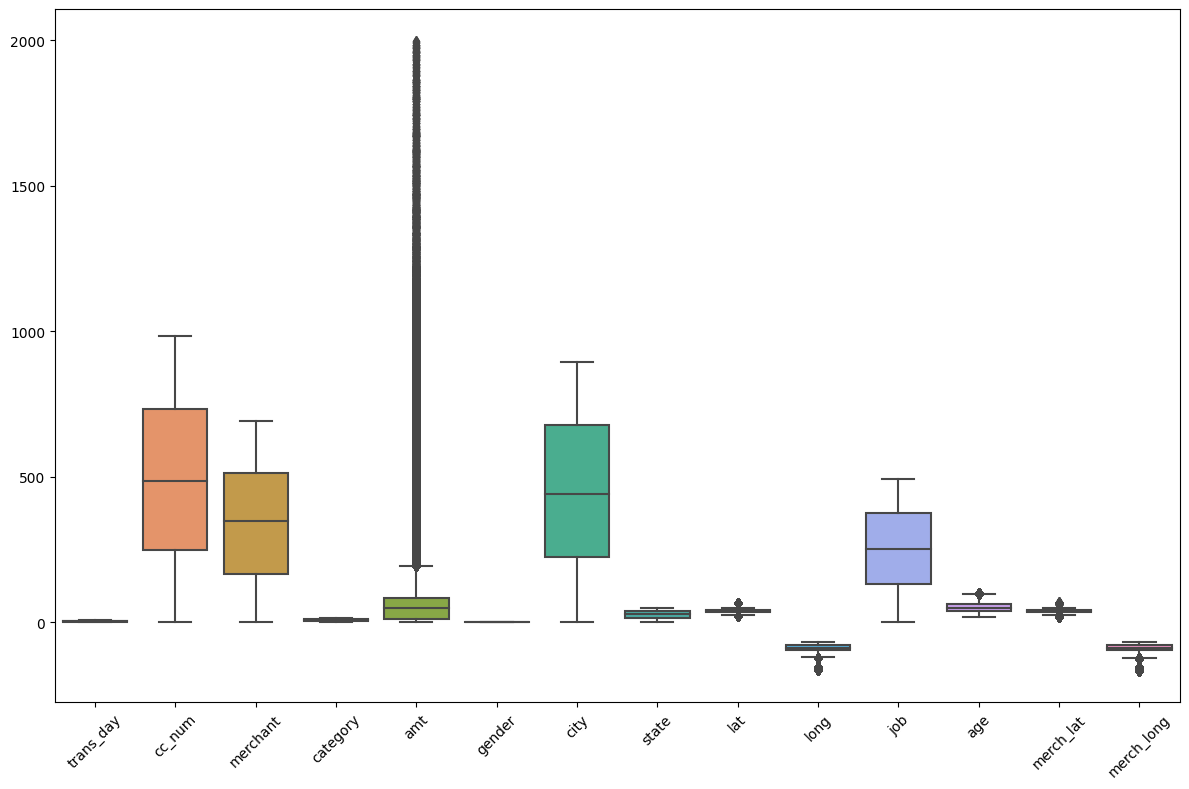

In [56]:
selected_cols = treated_df.columns
selected_cols = selected_cols.drop(['unix_time', 'city_pop'])

# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=treated_df[selected_cols])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


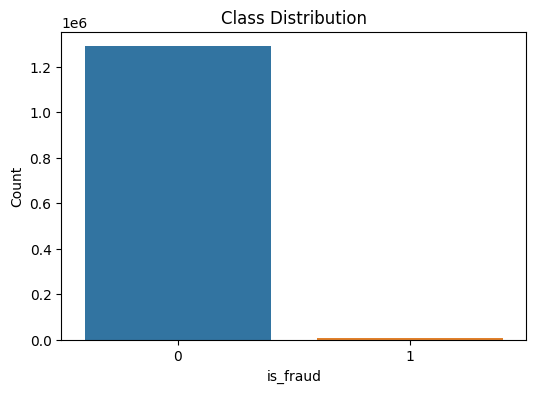

In [57]:
# Class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

### Saving the Preprocessed data

In [58]:
treated_df.shape

(1295722, 17)

In [59]:
treated_df.head()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long,is_fraud
0,1,444,514,8,4.97,0,526,27,36.0788,-81.1781,3495,370,36,1325376018,36.011293,-82.048315,0
1,1,42,241,4,107.23,0,612,47,48.8878,-118.2105,149,428,46,1325376044,49.159047,-118.186462,0
2,1,237,390,0,220.11,1,468,13,42.1808,-112.2620,4154,307,62,1325376051,43.150704,-112.154481,0
3,1,509,360,2,45.00,1,84,26,46.2306,-112.1138,1939,328,57,1325376076,47.034331,-112.561071,0
4,1,368,297,9,41.96,1,216,45,38.4207,-79.4629,99,116,38,1325376186,38.674999,-78.632459,0


In [60]:
treated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295722 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   trans_day   1295722 non-null  int32   
 1   cc_num      1295722 non-null  int64   
 2   merchant    1295722 non-null  int64   
 3   category    1295722 non-null  int64   
 4   amt         1295722 non-null  float64 
 5   gender      1295722 non-null  int64   
 6   city        1295722 non-null  int64   
 7   state       1295722 non-null  int64   
 8   lat         1295722 non-null  float64 
 9   long        1295722 non-null  float64 
 10  city_pop    1295722 non-null  int64   
 11  job         1295722 non-null  int64   
 12  age         1295722 non-null  int64   
 13  unix_time   1295722 non-null  int64   
 14  merch_lat   1295722 non-null  float64 
 15  merch_long  1295722 non-null  float64 
 16  is_fraud    1295722 non-null  category
dtypes: category(1), float64(5), int32(1), int64(10)
mem

In [61]:
treated_df.describe()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long
count,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06
mean,3.070746e+00,4.900540e+02,3.428564e+02,6.223951e+00,6.814126e+01,4.525531e-01,4.452667e+02,2.667724e+01,3.853799e+01,-9.022609e+01,8.881739e+04,2.511612e+02,5.023368e+01,1.349244e+09,3.853771e+01,-9.022623e+01
std,2.198135e+00,2.815028e+02,2.009576e+02,3.911875e+00,1.070357e+02,4.977439e-01,2.585986e+02,1.433082e+01,5.075704e+00,1.375888e+01,3.019441e+05,1.401106e+02,1.739536e+01,1.284129e+07,5.109697e+00,1.377090e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,0.000000e+00,1.900000e+01,1.325376e+09,1.902779e+01,-1.666712e+02
25%,1.000000e+00,2.480000e+02,1.650000e+02,3.000000e+00,9.650000e+00,0.000000e+00,2.240000e+02,1.500000e+01,3.466890e+01,-9.679800e+01,7.430000e+02,1.310000e+02,3.700000e+01,1.338751e+09,3.473418e+01,-9.689695e+01
50%,3.000000e+00,4.850000e+02,3.460000e+02,6.000000e+00,4.749000e+01,0.000000e+00,4.390000e+02,2.800000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,2.510000e+02,4.800000e+01,1.349250e+09,3.936612e+01,-8.743859e+01
75%,5.000000e+00,7.320000e+02,5.140000e+02,1.000000e+01,8.306000e+01,1.000000e+00,6.770000e+02,3.800000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,3.740000e+02,6.100000e+01,1.359386e+09,4.195734e+01,-8.023695e+01
max,6.000000e+00,9.820000e+02,6.920000e+02,1.300000e+01,1.999200e+03,1.000000e+00,8.930000e+02,5.000000e+01,6.669330e+01,-6.795030e+01,2.906700e+06,4.930000e+02,9.900000e+01,1.371817e+09,6.751027e+01,-6.695090e+01


In [62]:
# Saving the preprocessed data to local system
treated_df.drop(columns = 'city_pop').to_csv('preprocessed_fraudTrain.csv')

#### Load Train Data

In [63]:
temp = pd.read_csv('/kaggle/working/preprocessed_fraudTrain.csv', index_col=0)

In [64]:
temp.shape

(1295722, 16)

In [65]:
temp.head()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,job,age,unix_time,merch_lat,merch_long,is_fraud
0,1,444,514,8,4.97,0,526,27,36.0788,-81.1781,370,36,1325376018,36.011293,-82.048315,0
1,1,42,241,4,107.23,0,612,47,48.8878,-118.2105,428,46,1325376044,49.159047,-118.186462,0
2,1,237,390,0,220.11,1,468,13,42.1808,-112.2620,307,62,1325376051,43.150704,-112.154481,0
3,1,509,360,2,45.00,1,84,26,46.2306,-112.1138,328,57,1325376076,47.034331,-112.561071,0
4,1,368,297,9,41.96,1,216,45,38.4207,-79.4629,116,38,1325376186,38.674999,-78.632459,0


In [66]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295722 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_day   1295722 non-null  int64  
 1   cc_num      1295722 non-null  int64  
 2   merchant    1295722 non-null  int64  
 3   category    1295722 non-null  int64  
 4   amt         1295722 non-null  float64
 5   gender      1295722 non-null  int64  
 6   city        1295722 non-null  int64  
 7   state       1295722 non-null  int64  
 8   lat         1295722 non-null  float64
 9   long        1295722 non-null  float64
 10  job         1295722 non-null  int64  
 11  age         1295722 non-null  int64  
 12  unix_time   1295722 non-null  int64  
 13  merch_lat   1295722 non-null  float64
 14  merch_long  1295722 non-null  float64
 15  is_fraud    1295722 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 168.1 MB


In [67]:
temp.describe()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,job,age,unix_time,merch_lat,merch_long,is_fraud
count,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06,1.295722e+06
mean,3.070746e+00,4.900540e+02,3.428564e+02,6.223951e+00,6.814126e+01,4.525531e-01,4.452667e+02,2.667724e+01,3.853799e+01,-9.022609e+01,2.511612e+02,5.023368e+01,1.349244e+09,3.853771e+01,-9.022623e+01,5.792909e-03
std,2.198135e+00,2.815028e+02,2.009576e+02,3.911875e+00,1.070357e+02,4.977439e-01,2.585986e+02,1.433082e+01,5.075704e+00,1.375888e+01,1.401106e+02,1.739536e+01,1.284129e+07,5.109697e+00,1.377090e+01,7.589042e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.002710e+01,-1.656723e+02,0.000000e+00,1.900000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.000000e+00,2.480000e+02,1.650000e+02,3.000000e+00,9.650000e+00,0.000000e+00,2.240000e+02,1.500000e+01,3.466890e+01,-9.679800e+01,1.310000e+02,3.700000e+01,1.338751e+09,3.473418e+01,-9.689695e+01,0.000000e+00
50%,3.000000e+00,4.850000e+02,3.460000e+02,6.000000e+00,4.749000e+01,0.000000e+00,4.390000e+02,2.800000e+01,3.935430e+01,-8.747690e+01,2.510000e+02,4.800000e+01,1.349250e+09,3.936612e+01,-8.743859e+01,0.000000e+00
75%,5.000000e+00,7.320000e+02,5.140000e+02,1.000000e+01,8.306000e+01,1.000000e+00,6.770000e+02,3.800000e+01,4.194040e+01,-8.015800e+01,3.740000e+02,6.100000e+01,1.359386e+09,4.195734e+01,-8.023695e+01,0.000000e+00
max,6.000000e+00,9.820000e+02,6.920000e+02,1.300000e+01,1.999200e+03,1.000000e+00,8.930000e+02,5.000000e+01,6.669330e+01,-6.795030e+01,4.930000e+02,9.900000e+01,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# Preprocessing Test Data

## Loading Test Data

In [68]:
test_data = pd.read_csv("/kaggle/input/ccfd-dataset/test.csv")

In [69]:
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [70]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [71]:
test_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


#### Finding the day of the transaction

In [72]:
test_data["trans_date_trans_time"] = pd.to_datetime(test_data["trans_date_trans_time"])

In [73]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [74]:
test_data["trans_day"] = test_data["trans_date_trans_time"].dt.dayofweek

In [75]:
test_data['trans_day'].describe()

count    555719.000000
mean          2.726779
std           2.178681
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max           6.000000
Name: trans_day, dtype: float64

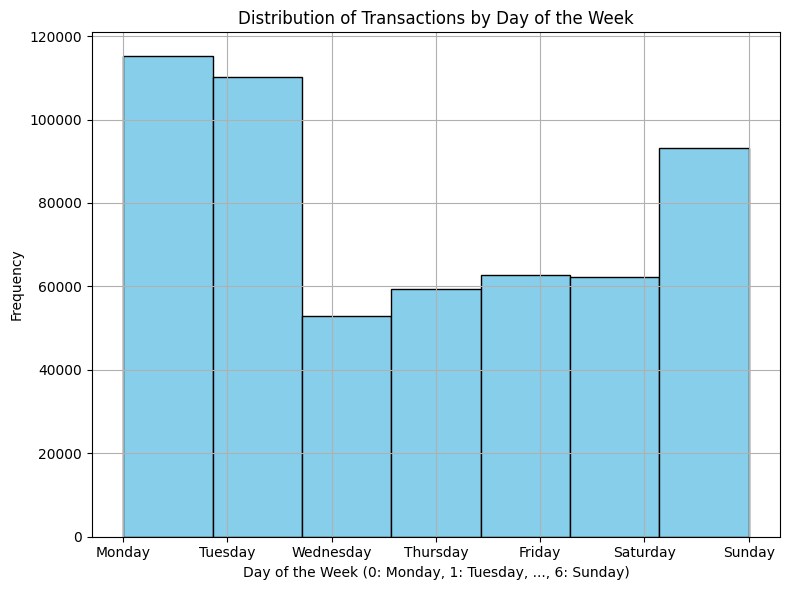

In [76]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(test_data['trans_day'], bins=7, color='skyblue', edgecolor='black')
plt.title('Distribution of Transactions by Day of the Week')
plt.xlabel('Day of the Week (0: Monday, 1: Tuesday, ..., 6: Sunday)')
plt.ylabel('Frequency')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.tight_layout()
plt.show()

#### Finding age using DOB

In [77]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [78]:
test_data['dob'] = pd.to_datetime(test_data['dob'])
test_data['dob'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 555719 entries, 0 to 555718
Series name: dob
Non-Null Count   Dtype         
--------------   -----         
555719 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.2 MB


In [79]:
from datetime import datetime

def calculate_age(dob):
    # Get the current date
    current_date = datetime.now()
    
    # Calculate age
    age = current_date.year - dob.year - ((current_date.month, current_date.day) < (dob.month, dob.day))
    
    return age

In [80]:
test_data['age'] = test_data['dob'].apply(calculate_age)
test_data['age']

0         56
1         34
2         53
3         36
4         68
          ..
555714    58
555715    24
555716    42
555717    58
555718    31
Name: age, Length: 555719, dtype: int64

In [81]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [82]:
test_data['age'].value_counts()

age
39    18174
51    17288
52    17079
48    16178
38    15117
      ...  
98      909
92      874
81      441
86      419
99      199
Name: count, Length: 81, dtype: int64

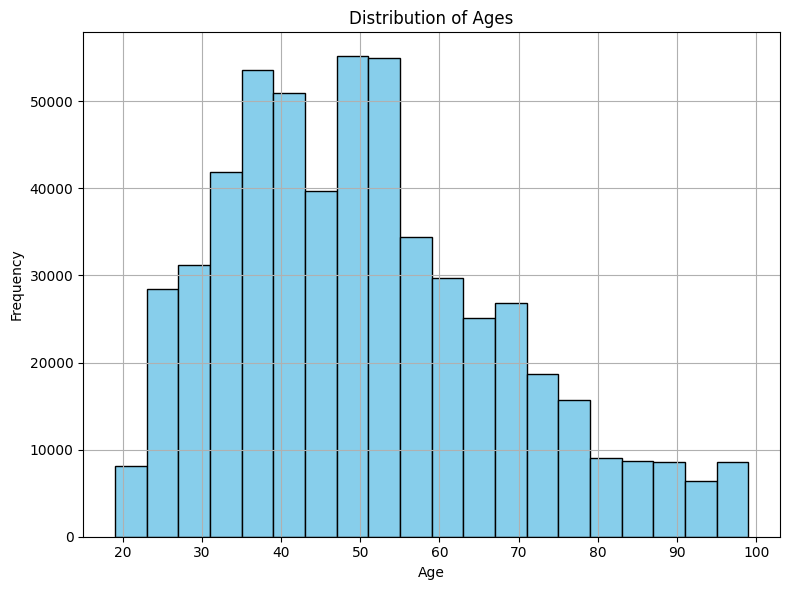

In [83]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(test_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Checking cities and state

In [84]:
test_data['street'].value_counts()

street
444 Robert Mews                  1474
6983 Carrillo Isle               1466
6114 Adams Harbor Suite 096      1462
6296 John Keys Suite 858         1458
43235 Mckenzie Views Apt. 837    1428
                                 ... 
6386 Bailey Hill Apt. 421           9
537 Brian Island                    9
44613 James Turnpike                8
610 Pacheco Parkway                 7
007 Tonya Isle Suite 299            6
Name: count, Length: 924, dtype: int64

In [85]:
test_data['city'].value_counts()

city
Birmingham     2423
Meridian       2229
Phoenix        2222
Utica          2204
San Antonio    2182
               ... 
Senatobia        10
Seattle           9
Guthrie           9
Rice              8
Wever             6
Name: count, Length: 849, dtype: int64

In [86]:
test_data['state'].value_counts().shape[0]

50

#### Removing irrelevant features

In [87]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [88]:
test_data.columns.tolist()

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'trans_day',
 'age']

In [89]:
selected_features = ['trans_day',
                     'cc_num',
                     'merchant',
                     'category',
                     'amt',
                     'gender',
                     'city',
                     'state',
                     'lat',
                     'long',
                     'city_pop',
                     'job',
                     'age',
                     'unix_time',
                     'merch_lat',
                     'merch_long',
                     'is_fraud',
]

In [90]:
test_data.shape[1]

25

In [91]:
df = test_data[selected_features].copy()

In [92]:
df

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long,is_fraud
0,6,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,56,1371816865,33.986391,-81.200714,0
1,6,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",34,1371816873,39.450498,-109.960431,0
2,6,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",53,1371816893,40.495810,-74.196111,0
3,6,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,36,1371816915,28.812398,-80.883061,0
4,6,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,68,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,3,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,MO,40.4931,-91.8912,519,Town planner,58,1388534347,39.946837,-91.333331,0
555715,3,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,29.0393,-95.4401,28739,Futures trader,24,1388534349,29.661049,-96.186633,0
555716,3,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,46.1966,-118.9017,3684,Musician,42,1388534355,46.658340,-119.715054,0
555717,3,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,Mesa,ID,44.6255,-116.4493,129,Cartographer,58,1388534364,44.470525,-117.080888,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_day   555719 non-null  int32  
 1   cc_num      555719 non-null  int64  
 2   merchant    555719 non-null  object 
 3   category    555719 non-null  object 
 4   amt         555719 non-null  float64
 5   gender      555719 non-null  object 
 6   city        555719 non-null  object 
 7   state       555719 non-null  object 
 8   lat         555719 non-null  float64
 9   long        555719 non-null  float64
 10  city_pop    555719 non-null  int64  
 11  job         555719 non-null  object 
 12  age         555719 non-null  int64  
 13  unix_time   555719 non-null  int64  
 14  merch_lat   555719 non-null  float64
 15  merch_long  555719 non-null  float64
 16  is_fraud    555719 non-null  int64  
dtypes: float64(5), int32(1), int64(5), object(6)
memory usage: 70.0+ MB


In [94]:
df['cc_num'] = df['cc_num'].astype('category')
df['merchant'] = df['merchant'].astype('category')
df['category'] = df['category'].astype('category')
df['gender'] = df['gender'].astype('category')
df['city'] = df['city'].astype('category')
df['state'] = df['state'].astype('category')
df['job'] = df['job'].astype('category')
df['is_fraud'] = df['is_fraud'].astype('category')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   trans_day   555719 non-null  int32   
 1   cc_num      555719 non-null  category
 2   merchant    555719 non-null  category
 3   category    555719 non-null  category
 4   amt         555719 non-null  float64 
 5   gender      555719 non-null  category
 6   city        555719 non-null  category
 7   state       555719 non-null  category
 8   lat         555719 non-null  float64 
 9   long        555719 non-null  float64 
 10  city_pop    555719 non-null  int64   
 11  job         555719 non-null  category
 12  age         555719 non-null  int64   
 13  unix_time   555719 non-null  int64   
 14  merch_lat   555719 non-null  float64 
 15  merch_long  555719 non-null  float64 
 16  is_fraud    555719 non-null  category
dtypes: category(8), float64(5), int32(1), int64(3)
memory usage: 42.5 M

In [96]:
df.head()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long,is_fraud
0,6,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,56,1371816865,33.986391,-81.200714,0
1,6,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",34,1371816873,39.450498,-109.960431,0
2,6,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",53,1371816893,40.495810,-74.196111,0
3,6,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,36,1371816915,28.812398,-80.883061,0
4,6,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,68,1371816917,44.959148,-85.884734,0


#### Using Label Encoder to convert categorical variables into numerical features

In [97]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
# Select the categorical columns
cat_columns = df.select_dtypes(include=['category']).columns
cat_columns = cat_columns.drop('is_fraud')

# Initialize the LabelEncoder
label_encoders = {}

# Iterate over each categorical column
for col in cat_columns:
    # Initialize LabelEncoder for the column
    label_encoders[col] = LabelEncoder()
    
    # Fit LabelEncoder and transform the column
    df[col] = label_encoders[col].fit_transform(df[col])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   trans_day   555719 non-null  int32   
 1   cc_num      555719 non-null  int64   
 2   merchant    555719 non-null  int64   
 3   category    555719 non-null  int64   
 4   amt         555719 non-null  float64 
 5   gender      555719 non-null  int64   
 6   city        555719 non-null  int64   
 7   state       555719 non-null  int64   
 8   lat         555719 non-null  float64 
 9   long        555719 non-null  float64 
 10  city_pop    555719 non-null  int64   
 11  job         555719 non-null  int64   
 12  age         555719 non-null  int64   
 13  unix_time   555719 non-null  int64   
 14  merch_lat   555719 non-null  float64 
 15  merch_long  555719 non-null  float64 
 16  is_fraud    555719 non-null  category
dtypes: category(1), float64(5), int32(1), int64(10)
memory usage: 66.2 

In [99]:
df.head()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long,is_fraud
0,6,409,319,10,2.86,1,157,39,33.9659,-80.9355,333497,275,56,1371816865,33.986391,-81.200714,0
1,6,552,591,10,29.84,0,16,43,40.3207,-110.4360,302,392,34,1371816873,39.450498,-109.960431,0
2,6,596,611,5,41.28,0,61,33,40.6729,-73.5365,34496,259,53,1371816893,40.495810,-74.196111,0
3,6,583,222,9,60.05,1,764,8,28.5697,-80.8191,54767,407,36,1371816915,28.812398,-80.883061,0
4,6,470,292,13,3.19,1,247,21,44.2529,-85.0170,1126,196,68,1371816917,44.959148,-85.884734,0


## Exploratory Data Analysis

In [100]:
# Summary statistics
print(df.describe())

           trans_day         cc_num       merchant       category  \
count  555719.000000  555719.000000  555719.000000  555719.000000   
mean        2.726779     463.783434     343.086430       6.237059   
std         2.178681     265.537414     201.284993       3.912874   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000     233.000000     166.000000       3.000000   
50%         2.000000     463.000000     346.000000       6.000000   
75%         5.000000     693.000000     515.000000      10.000000   
max         6.000000     923.000000     692.000000      13.000000   

                 amt         gender           city          state  \
count  555719.000000  555719.000000  555719.000000  555719.000000   
mean       69.392810       0.451367     422.283741      25.771627   
std       156.745941       0.497630     244.812950      14.116718   
min         1.000000       0.000000       0.000000       0.000000   
25%         9.630000       0.0000

<Figure size 1200x800 with 0 Axes>

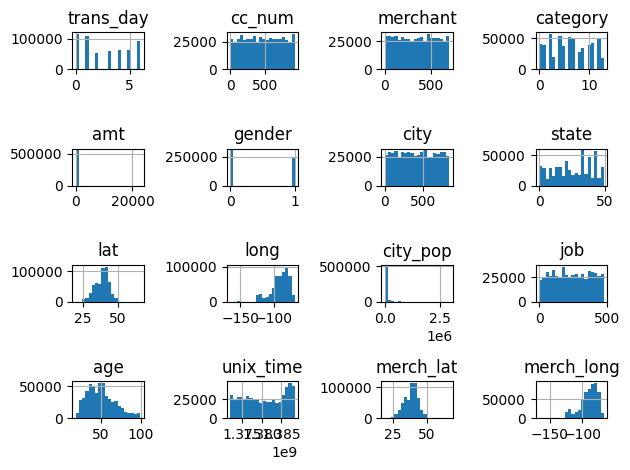

In [101]:
# Histograms
plt.figure(figsize=(12, 8))
df.hist(bins=20)
plt.tight_layout()
plt.show()

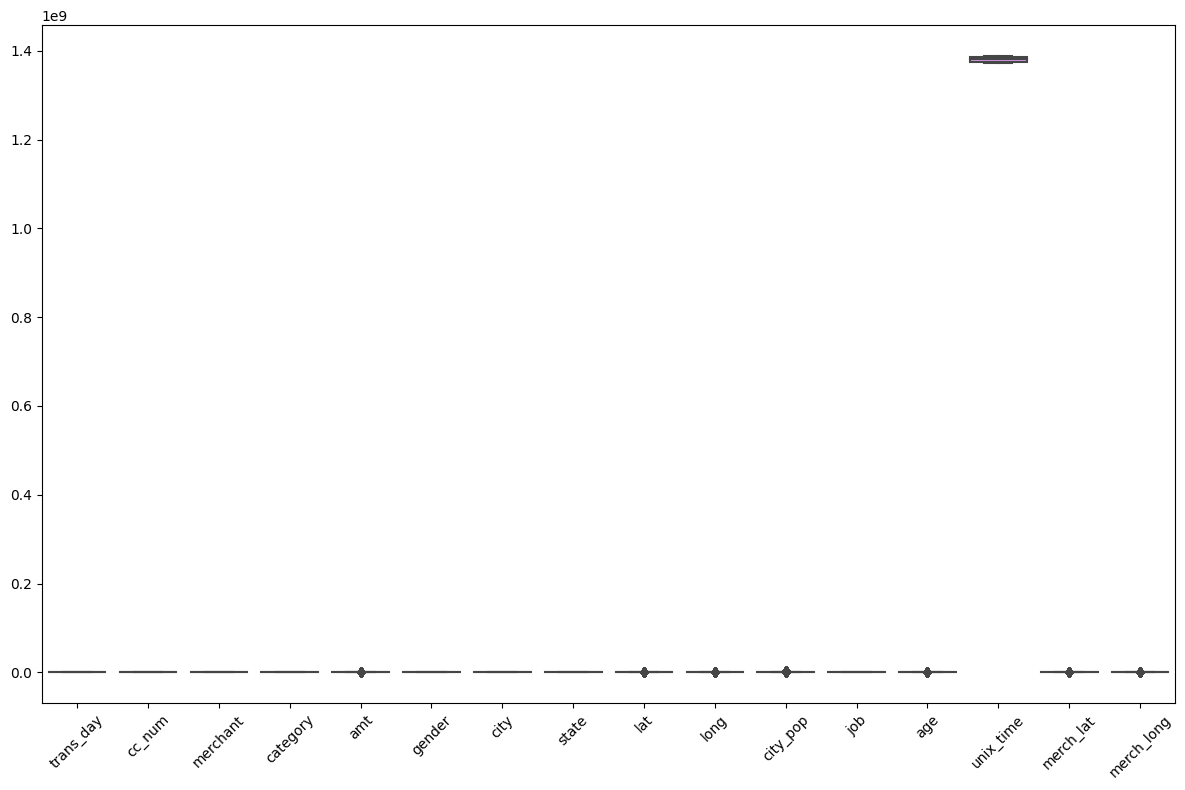

In [102]:
# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

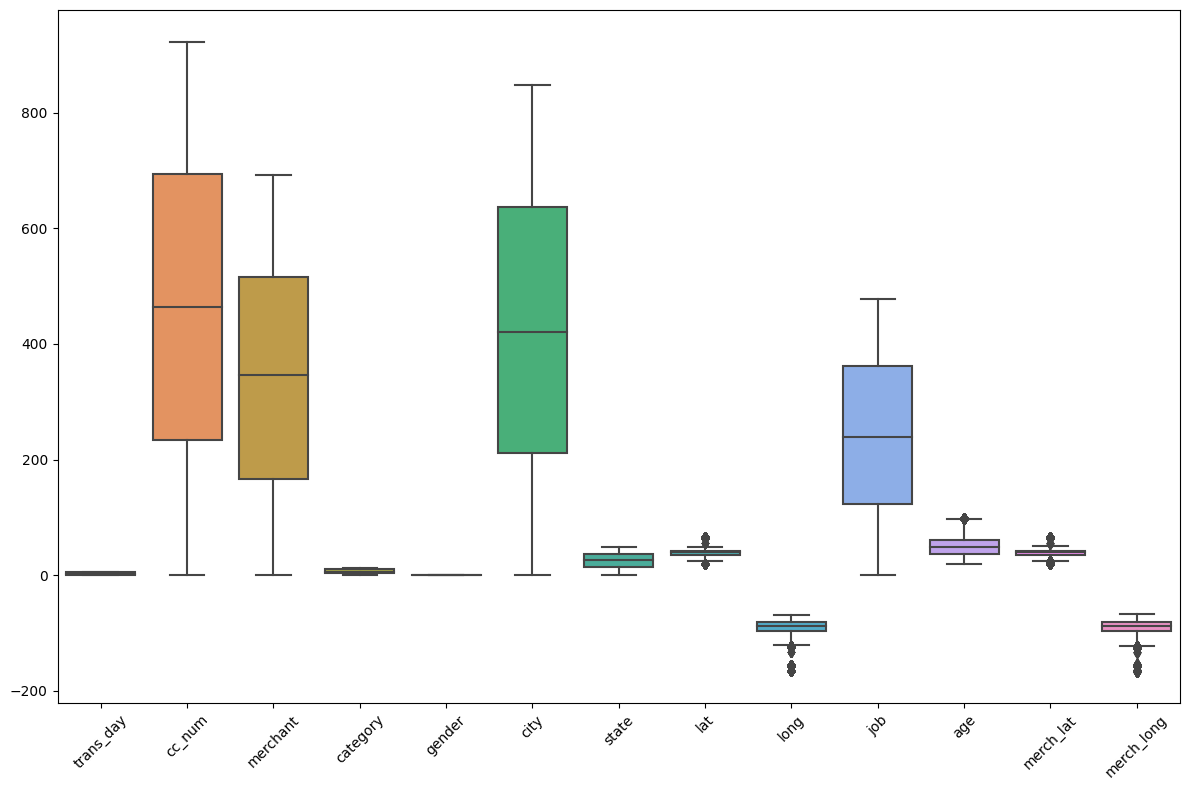

In [103]:
selected_cols = df.columns
selected_cols = selected_cols.drop(['unix_time', 'city_pop', 'amt'])

# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[selected_cols])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

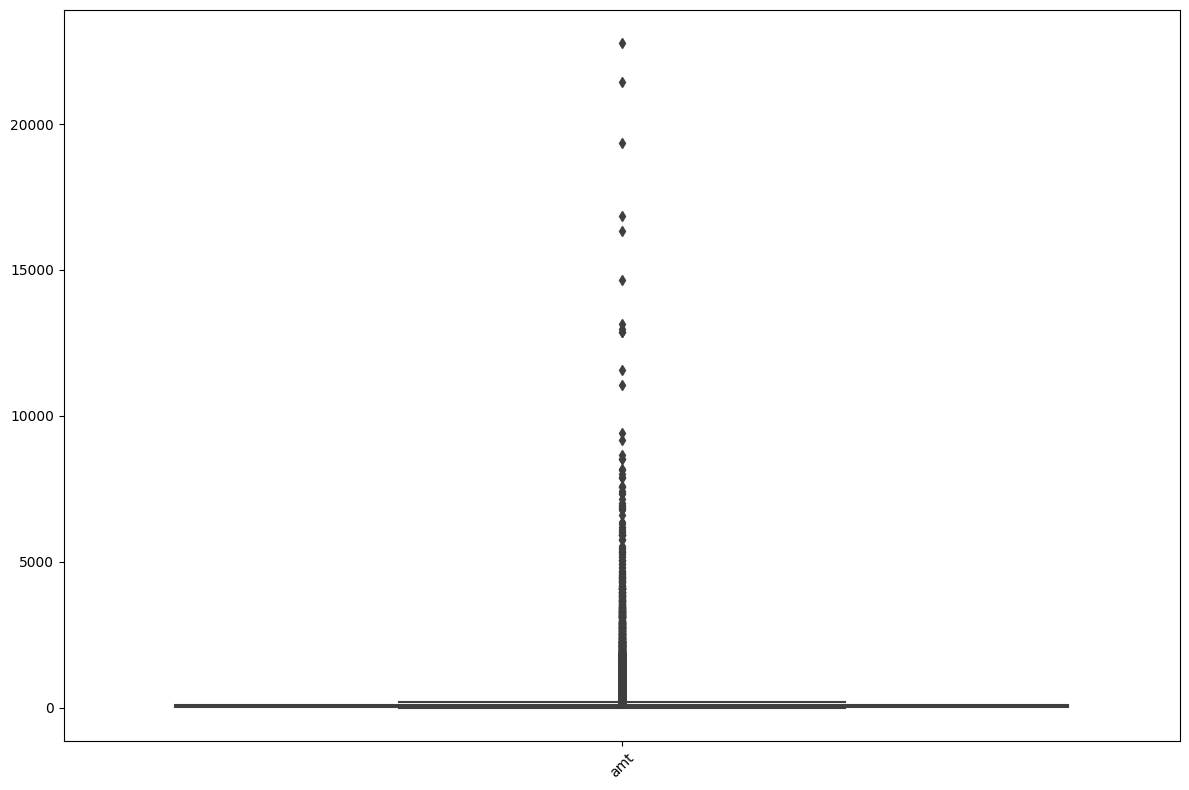

In [104]:
# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['amt']])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [105]:
df['amt'].describe()

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

In [106]:
df['amt'].value_counts()

amt
1.10       239
1.14       237
1.08       229
1.65       227
1.03       227
          ... 
279.11       1
708.96       1
233.43       1
399.94       1
1164.37      1
Name: count, Length: 37256, dtype: int64

In [107]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


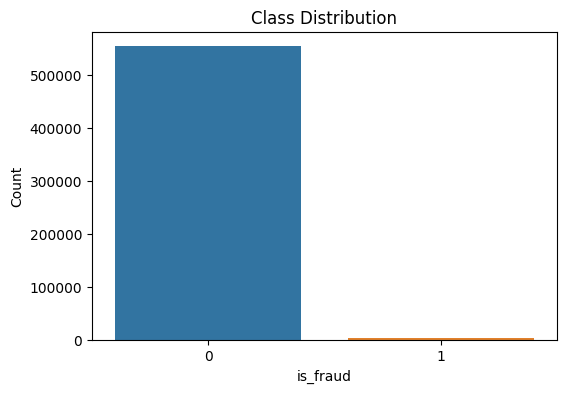

In [108]:
# Class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

#### Treating 'amt' feature

In [109]:
df['amt'].describe()

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

In [110]:
print(df['amt'].value_counts().sort_index(ascending=False).iloc[:1000])

amt
22768.11    1
21437.71    1
19364.91    1
16837.08    1
16339.26    1
           ..
1183.88     1
1183.63     1
1183.42     1
1180.85     1
1180.79     1
Name: count, Length: 1000, dtype: int64


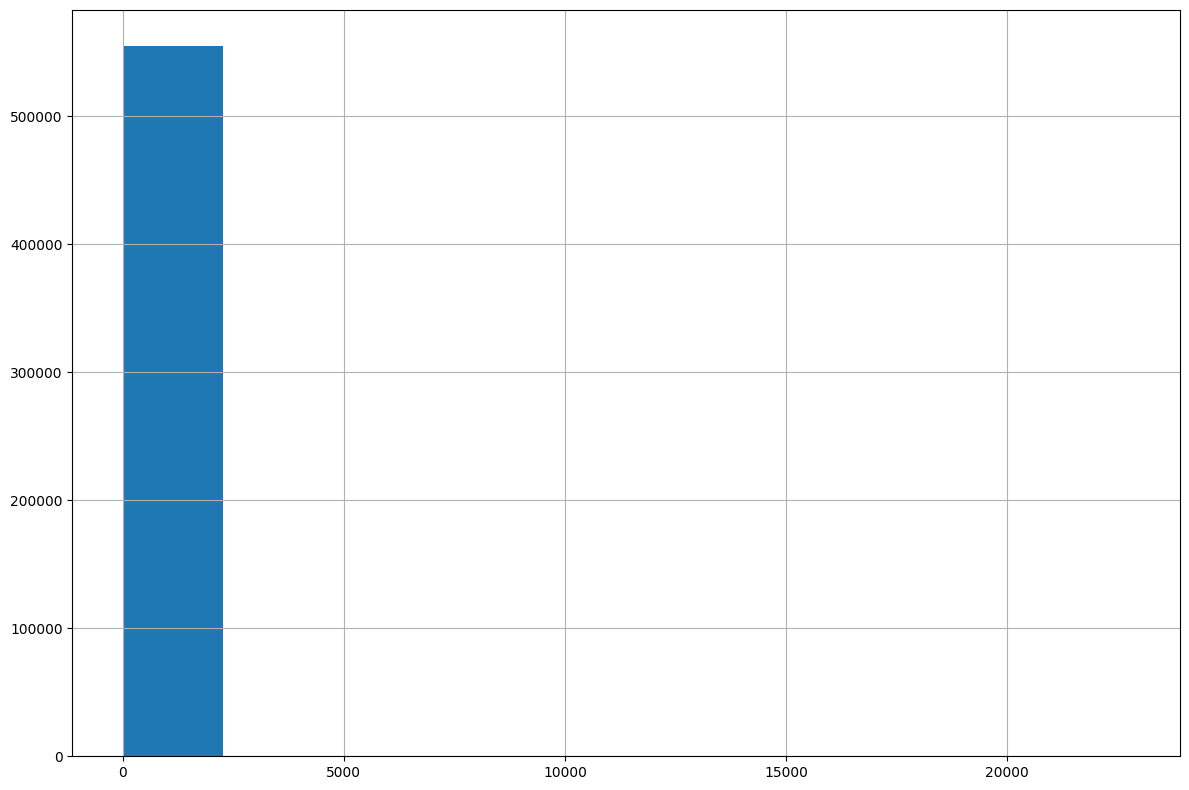

In [111]:
# Histograms
plt.figure(figsize=(12, 8))
df['amt'].hist(bins=10)
plt.tight_layout()
plt.show()

In [112]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]

# Print the outlier entries
print("Outliers in 'amt' column:")
print(outliers)

Outliers in 'amt' column:
        trans_day  cc_num  merchant  category      amt  gender  city  state  \
33              6     231       451         0   210.36       0    42     47   
100             6     832       207         5   242.35       0   605     37   
133             6     121       191        13   558.03       1   225     17   
167             6     767       571        11  1199.45       0   836     26   
245             6     102       237        11   236.15       1   845      1   
...           ...     ...       ...       ...      ...     ...   ...    ...   
555526          3     911       612         7   290.11       0   828     23   
555625          3     824       660         7   255.42       1   200     21   
555629          3     391       114        10   302.79       1   782     15   
555637          3     767       193        11  1164.37       0   836     26   
555647          3     784        13        11   410.05       0   191      2   

            lat      long

In [113]:
outliers['amt'].value_counts().sort_index(ascending=False)

amt
22768.11    1
21437.71    1
19364.91    1
16837.08    1
16339.26    1
           ..
193.13      3
193.12      5
193.11      1
193.10      3
193.09      7
Name: count, Length: 18141, dtype: int64

In [114]:
outliers['is_fraud'].value_counts()

is_fraud
0    26165
1     1613
Name: count, dtype: int64

In [115]:
fraud = outliers[outliers['is_fraud'] == 1]
fraud.shape

(1613, 17)

In [116]:
fraud['amt'].describe()

count    1613.000000
mean      693.481271
std       307.842936
min       195.690000
25%       326.380000
50%       793.610000
75%       959.440000
max      1320.920000
Name: amt, dtype: float64

#### Selecting Data samples with 'amt' less than 2000

In [117]:
df[df['is_fraud'] == 1]['amt'].describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

In [118]:
# bounds from quantiles of the IQR
lower_bound, upper_bound

(-100.44000000000003, 193.08000000000004)

In [119]:
treated_df = df[(df['amt'] > 1) & (df['amt'] <= 2000)]
treated_df.shape

(555250, 17)

### Visualizing the treated data

In [120]:
treated_df.describe()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long
count,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,5.552500e+05,555250.000000,555250.000000,5.552500e+05,555250.000000,555250.000000
mean,2.726752,463.763263,343.091984,6.232647,66.965774,0.451352,422.297783,25.772484,38.543290,-90.232199,8.820860e+04,241.755335,50.127382,1.380679e+09,38.542823,-90.232258
std,2.178662,265.535345,201.295374,3.911075,103.039335,0.497628,244.822063,14.117088,5.061521,13.722355,3.003969e+05,136.331109,17.436232,5.201178e+06,5.096045,13.733638
min,0.000000,0.000000,0.000000,0.000000,1.010000,0.000000,0.000000,0.000000,20.027100,-165.672300,2.300000e+01,0.000000,19.000000,1.371817e+09,19.027422,-166.671575
25%,1.000000,233.000000,166.000000,3.000000,9.630000,0.000000,212.000000,14.000000,34.668900,-96.798000,7.410000e+02,124.000000,37.000000,1.376029e+09,34.755731,-96.905489
50%,2.000000,463.000000,346.000000,6.000000,47.260000,0.000000,420.000000,26.000000,39.371600,-87.476900,2.408000e+03,239.000000,48.000000,1.380763e+09,39.376587,-87.446589
75%,5.000000,693.000000,515.000000,10.000000,82.920000,1.000000,637.000000,37.000000,41.894800,-80.175200,1.968500e+04,362.000000,61.000000,1.385867e+09,41.954107,-80.265231
max,6.000000,923.000000,692.000000,13.000000,1994.170000,1.000000,848.000000,49.000000,65.689900,-67.950300,2.906700e+06,477.000000,99.000000,1.388534e+09,66.679297,-66.952026


<Figure size 1200x800 with 0 Axes>

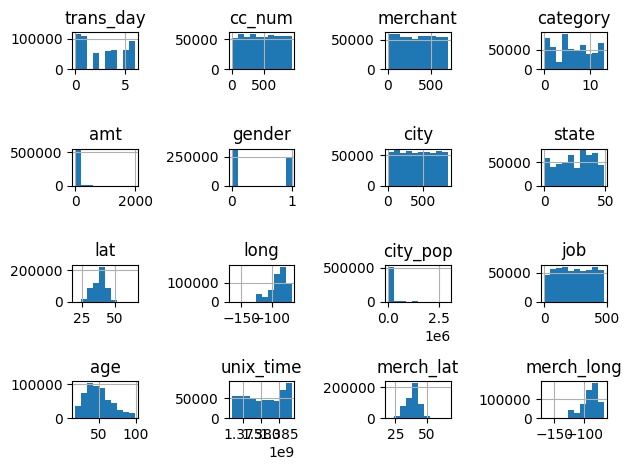

In [121]:
# Histograms
plt.figure(figsize=(12, 8))
treated_df.hist(bins=10)
plt.tight_layout()
plt.show()

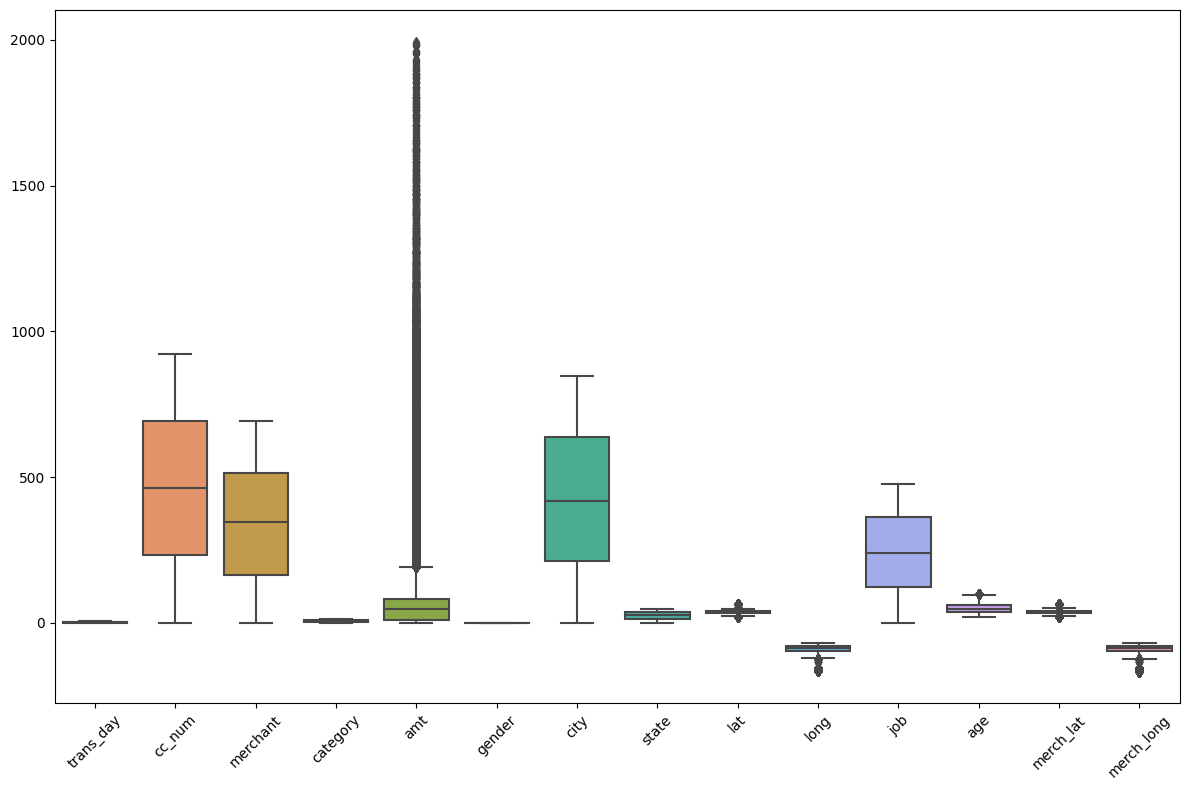

In [122]:
selected_cols = treated_df.columns
selected_cols = selected_cols.drop(['unix_time', 'city_pop'])

# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=treated_df[selected_cols])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


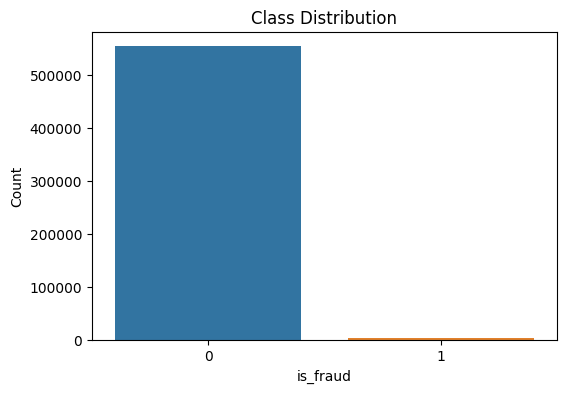

In [123]:
# Class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

### Saving the Preprocessed data

In [124]:
treated_df.shape

(555250, 17)

In [125]:
treated_df.head()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long,is_fraud
0,6,409,319,10,2.86,1,157,39,33.9659,-80.9355,333497,275,56,1371816865,33.986391,-81.200714,0
1,6,552,591,10,29.84,0,16,43,40.3207,-110.4360,302,392,34,1371816873,39.450498,-109.960431,0
2,6,596,611,5,41.28,0,61,33,40.6729,-73.5365,34496,259,53,1371816893,40.495810,-74.196111,0
3,6,583,222,9,60.05,1,764,8,28.5697,-80.8191,54767,407,36,1371816915,28.812398,-80.883061,0
4,6,470,292,13,3.19,1,247,21,44.2529,-85.0170,1126,196,68,1371816917,44.959148,-85.884734,0


In [126]:
treated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555250 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   trans_day   555250 non-null  int32   
 1   cc_num      555250 non-null  int64   
 2   merchant    555250 non-null  int64   
 3   category    555250 non-null  int64   
 4   amt         555250 non-null  float64 
 5   gender      555250 non-null  int64   
 6   city        555250 non-null  int64   
 7   state       555250 non-null  int64   
 8   lat         555250 non-null  float64 
 9   long        555250 non-null  float64 
 10  city_pop    555250 non-null  int64   
 11  job         555250 non-null  int64   
 12  age         555250 non-null  int64   
 13  unix_time   555250 non-null  int64   
 14  merch_lat   555250 non-null  float64 
 15  merch_long  555250 non-null  float64 
 16  is_fraud    555250 non-null  category
dtypes: category(1), float64(5), int32(1), int64(10)
memory usage: 70.4 MB


In [127]:
treated_df.describe()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,age,unix_time,merch_lat,merch_long
count,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,5.552500e+05,555250.000000,555250.000000,5.552500e+05,555250.000000,555250.000000
mean,2.726752,463.763263,343.091984,6.232647,66.965774,0.451352,422.297783,25.772484,38.543290,-90.232199,8.820860e+04,241.755335,50.127382,1.380679e+09,38.542823,-90.232258
std,2.178662,265.535345,201.295374,3.911075,103.039335,0.497628,244.822063,14.117088,5.061521,13.722355,3.003969e+05,136.331109,17.436232,5.201178e+06,5.096045,13.733638
min,0.000000,0.000000,0.000000,0.000000,1.010000,0.000000,0.000000,0.000000,20.027100,-165.672300,2.300000e+01,0.000000,19.000000,1.371817e+09,19.027422,-166.671575
25%,1.000000,233.000000,166.000000,3.000000,9.630000,0.000000,212.000000,14.000000,34.668900,-96.798000,7.410000e+02,124.000000,37.000000,1.376029e+09,34.755731,-96.905489
50%,2.000000,463.000000,346.000000,6.000000,47.260000,0.000000,420.000000,26.000000,39.371600,-87.476900,2.408000e+03,239.000000,48.000000,1.380763e+09,39.376587,-87.446589
75%,5.000000,693.000000,515.000000,10.000000,82.920000,1.000000,637.000000,37.000000,41.894800,-80.175200,1.968500e+04,362.000000,61.000000,1.385867e+09,41.954107,-80.265231
max,6.000000,923.000000,692.000000,13.000000,1994.170000,1.000000,848.000000,49.000000,65.689900,-67.950300,2.906700e+06,477.000000,99.000000,1.388534e+09,66.679297,-66.952026


In [128]:
# Saving the preprocessed data to local system
treated_df.drop(columns = 'city_pop').to_csv('preprocessed_fraudTest.csv')

#### Load Test Data

In [129]:
temp = pd.read_csv('/kaggle/working/preprocessed_fraudTest.csv', index_col=0)

In [130]:
temp.shape

(555250, 16)

In [131]:
temp.head()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,job,age,unix_time,merch_lat,merch_long,is_fraud
0,6,409,319,10,2.86,1,157,39,33.9659,-80.9355,275,56,1371816865,33.986391,-81.200714,0
1,6,552,591,10,29.84,0,16,43,40.3207,-110.4360,392,34,1371816873,39.450498,-109.960431,0
2,6,596,611,5,41.28,0,61,33,40.6729,-73.5365,259,53,1371816893,40.495810,-74.196111,0
3,6,583,222,9,60.05,1,764,8,28.5697,-80.8191,407,36,1371816915,28.812398,-80.883061,0
4,6,470,292,13,3.19,1,247,21,44.2529,-85.0170,196,68,1371816917,44.959148,-85.884734,0


In [132]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555250 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_day   555250 non-null  int64  
 1   cc_num      555250 non-null  int64  
 2   merchant    555250 non-null  int64  
 3   category    555250 non-null  int64  
 4   amt         555250 non-null  float64
 5   gender      555250 non-null  int64  
 6   city        555250 non-null  int64  
 7   state       555250 non-null  int64  
 8   lat         555250 non-null  float64
 9   long        555250 non-null  float64
 10  job         555250 non-null  int64  
 11  age         555250 non-null  int64  
 12  unix_time   555250 non-null  int64  
 13  merch_lat   555250 non-null  float64
 14  merch_long  555250 non-null  float64
 15  is_fraud    555250 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 72.0 MB


In [133]:
temp.describe()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,job,age,unix_time,merch_lat,merch_long,is_fraud
count,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,555250.000000,5.552500e+05,555250.000000,555250.000000,555250.000000
mean,2.726752,463.763263,343.091984,6.232647,66.965774,0.451352,422.297783,25.772484,38.543290,-90.232199,241.755335,50.127382,1.380679e+09,38.542823,-90.232258,0.003863
std,2.178662,265.535345,201.295374,3.911075,103.039335,0.497628,244.822063,14.117088,5.061521,13.722355,136.331109,17.436232,5.201178e+06,5.096045,13.733638,0.062034
min,0.000000,0.000000,0.000000,0.000000,1.010000,0.000000,0.000000,0.000000,20.027100,-165.672300,0.000000,19.000000,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.000000,233.000000,166.000000,3.000000,9.630000,0.000000,212.000000,14.000000,34.668900,-96.798000,124.000000,37.000000,1.376029e+09,34.755731,-96.905489,0.000000
50%,2.000000,463.000000,346.000000,6.000000,47.260000,0.000000,420.000000,26.000000,39.371600,-87.476900,239.000000,48.000000,1.380763e+09,39.376587,-87.446589,0.000000
75%,5.000000,693.000000,515.000000,10.000000,82.920000,1.000000,637.000000,37.000000,41.894800,-80.175200,362.000000,61.000000,1.385867e+09,41.954107,-80.265231,0.000000
max,6.000000,923.000000,692.000000,13.000000,1994.170000,1.000000,848.000000,49.000000,65.689900,-67.950300,477.000000,99.000000,1.388534e+09,66.679297,-66.952026,1.000000


# Model Training

## Uploading the Dataset

In [134]:
data = pd.read_csv('/kaggle/working/preprocessed_fraudTrain.csv', index_col=0)
test_data = pd.read_csv('/kaggle/working/preprocessed_fraudTest.csv', index_col=0)

In [135]:
data.head()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,job,age,unix_time,merch_lat,merch_long,is_fraud
0,1,444,514,8,4.97,0,526,27,36.0788,-81.1781,370,36,1325376018,36.011293,-82.048315,0
1,1,42,241,4,107.23,0,612,47,48.8878,-118.2105,428,46,1325376044,49.159047,-118.186462,0
2,1,237,390,0,220.11,1,468,13,42.1808,-112.2620,307,62,1325376051,43.150704,-112.154481,0
3,1,509,360,2,45.00,1,84,26,46.2306,-112.1138,328,57,1325376076,47.034331,-112.561071,0
4,1,368,297,9,41.96,1,216,45,38.4207,-79.4629,116,38,1325376186,38.674999,-78.632459,0


In [136]:
test_data.head()

,trans_day,cc_num,merchant,category,amt,gender,city,state,lat,long,job,age,unix_time,merch_lat,merch_long,is_fraud
0,6,409,319,10,2.86,1,157,39,33.9659,-80.9355,275,56,1371816865,33.986391,-81.200714,0
1,6,552,591,10,29.84,0,16,43,40.3207,-110.4360,392,34,1371816873,39.450498,-109.960431,0
2,6,596,611,5,41.28,0,61,33,40.6729,-73.5365,259,53,1371816893,40.495810,-74.196111,0
3,6,583,222,9,60.05,1,764,8,28.5697,-80.8191,407,36,1371816915,28.812398,-80.883061,0
4,6,470,292,13,3.19,1,247,21,44.2529,-85.0170,196,68,1371816917,44.959148,-85.884734,0


#### Check Correlation

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295722 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_day   1295722 non-null  int64  
 1   cc_num      1295722 non-null  int64  
 2   merchant    1295722 non-null  int64  
 3   category    1295722 non-null  int64  
 4   amt         1295722 non-null  float64
 5   gender      1295722 non-null  int64  
 6   city        1295722 non-null  int64  
 7   state       1295722 non-null  int64  
 8   lat         1295722 non-null  float64
 9   long        1295722 non-null  float64
 10  job         1295722 non-null  int64  
 11  age         1295722 non-null  int64  
 12  unix_time   1295722 non-null  int64  
 13  merch_lat   1295722 non-null  float64
 14  merch_long  1295722 non-null  float64
 15  is_fraud    1295722 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 168.1 MB


In [138]:
# Checking the correlation in the training data
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

            trans_day    cc_num  merchant  category       amt    gender  \
trans_day    1.000000 -0.001214  0.000489 -0.001032 -0.000498 -0.000922   
cc_num      -0.001214  1.000000 -0.000526  0.005641  0.004161 -0.040442   
merchant     0.000489 -0.000526  1.000000  0.032325 -0.004110 -0.000915   
category    -0.001032  0.005641  0.032325  1.000000  0.014176 -0.028280   
amt         -0.000498  0.004161 -0.004110  0.014176  1.000000  0.000879   
gender      -0.000922 -0.040442 -0.000915 -0.028280  0.000879  1.000000   
city        -0.001085  0.001007 -0.000303  0.000814  0.000170  0.016060   
state        0.000854 -0.011888 -0.000407  0.000211  0.001748 -0.031760   
lat          0.000499 -0.005715 -0.002230 -0.008587 -0.001200  0.043049   
long         0.001619 -0.019858 -0.000660 -0.000730 -0.000879  0.050406   
job          0.000711  0.091213  0.001376  0.003383 -0.002663 -0.079943   
age         -0.011551 -0.032532 -0.006552 -0.003895 -0.014606  0.006522   
unix_time   -0.029310  0.

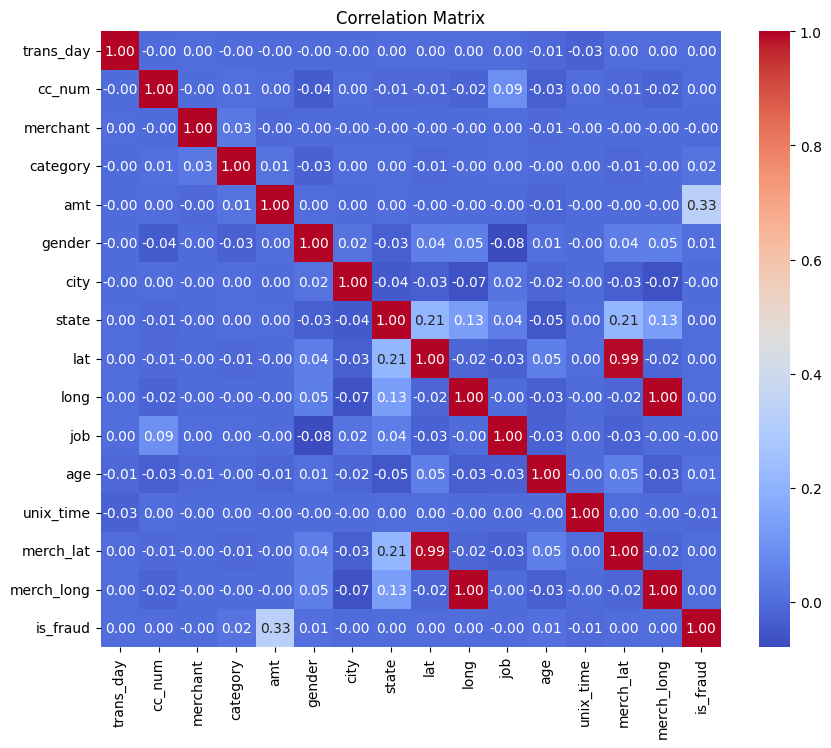

In [139]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Selecting Features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

# Define the number of features to select
k = 5  # You can change this value as needed

# Initialize SelectKBest with the scoring function
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to your data and transform the features
X_selected = selector.fit_transform(data.drop(columns=['is_fraud']), data['is_fraud'])

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = data.columns[selected_indices]

# Print the names of the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['category', 'amt', 'gender', 'age', 'unix_time'], dtype='object')


In [ ]:
# selected_features = selected_features.drop(['merch_lat', 'city', 'state'])
selected_features = selected_features.append(pd.Index(['cc_num', 'merchant', 'is_fraud']))

print("Selected Features:", selected_features)

Selected Features: Index(['category', 'amt', 'gender', 'age', 'unix_time', 'cc_num', 'merchant',
       'is_fraud'],
      dtype='object')


In [ ]:
len(selected_features)

8

### Updating dataframe copies

#### Train Data

In [ ]:
data = data[selected_features]

In [ ]:
data.shape

(1295722, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295722 entries, 0 to 1296674
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   category   1295722 non-null  int64  
 1   amt        1295722 non-null  float64
 2   gender     1295722 non-null  int64  
 3   age        1295722 non-null  int64  
 4   unix_time  1295722 non-null  int64  
 5   cc_num     1295722 non-null  int64  
 6   merchant   1295722 non-null  int64  
 7   is_fraud   1295722 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 89.0 MB


In [ ]:
data.head()

,category,amt,gender,age,unix_time,cc_num,merchant,is_fraud
0,8,4.97,0,36,1325376018,444,514,0
1,4,107.23,0,46,1325376044,42,241,0
2,0,220.11,1,62,1325376051,237,390,0
3,2,45.00,1,57,1325376076,509,360,0
4,9,41.96,1,38,1325376186,368,297,0


#### Test Data

In [ ]:
test_data = test_data[selected_features]

In [ ]:
test_data.shape

(555250, 8)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555250 entries, 0 to 555718
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   category   555250 non-null  int64  
 1   amt        555250 non-null  float64
 2   gender     555250 non-null  int64  
 3   age        555250 non-null  int64  
 4   unix_time  555250 non-null  int64  
 5   cc_num     555250 non-null  int64  
 6   merchant   555250 non-null  int64  
 7   is_fraud   555250 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 38.1 MB


In [ ]:
test_data.head()

,category,amt,gender,age,unix_time,cc_num,merchant,is_fraud
0,10,2.86,1,56,1371816865,409,319,0
1,10,29.84,0,34,1371816873,552,591,0
2,5,41.28,0,53,1371816893,596,611,0
3,9,60.05,1,36,1371816915,583,222,0
4,13,3.19,1,68,1371816917,470,292,0


### Distributing Features and target variables

#### Train Data

In [ ]:
X = data.drop(columns = ['is_fraud'])
y = data['is_fraud']

In [ ]:
X.shape, y.shape

((1295722, 7), (1295722,))

In [ ]:
X.head()

,category,amt,gender,age,unix_time,cc_num,merchant
0,8,4.97,0,36,1325376018,444,514
1,4,107.23,0,46,1325376044,42,241
2,0,220.11,1,62,1325376051,237,390
3,2,45.00,1,57,1325376076,509,360
4,9,41.96,1,38,1325376186,368,297


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [ ]:
X.info()

print()

y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295722 entries, 0 to 1296674
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   category   1295722 non-null  int64  
 1   amt        1295722 non-null  float64
 2   gender     1295722 non-null  int64  
 3   age        1295722 non-null  int64  
 4   unix_time  1295722 non-null  int64  
 5   cc_num     1295722 non-null  int64  
 6   merchant   1295722 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 79.1 MB

<class 'pandas.core.series.Series'>
Index: 1295722 entries, 0 to 1296674
Series name: is_fraud
Non-Null Count    Dtype
--------------    -----
1295722 non-null  int64
dtypes: int64(1)
memory usage: 19.8 MB


### Splitting Train Data into Train/Validation Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (1036577, 7)
y_train shape: (1036577,)
X_val shape: (259145, 7)
y_val shape: (259145,)


#### Test Set

In [ ]:
X_test = test_data.drop(columns = ['is_fraud'])
y_test = test_data['is_fraud']

In [ ]:
X_test.shape, y_test.shape

((555250, 7), (555250,))

In [ ]:
X_test.head()

,category,amt,gender,age,unix_time,cc_num,merchant
0,10,2.86,1,56,1371816865,409,319
1,10,29.84,0,34,1371816873,552,591
2,5,41.28,0,53,1371816893,596,611
3,9,60.05,1,36,1371816915,583,222
4,13,3.19,1,68,1371816917,470,292


In [ ]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [ ]:
X_test.info()

print()

y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555250 entries, 0 to 555718
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   category   555250 non-null  int64  
 1   amt        555250 non-null  float64
 2   gender     555250 non-null  int64  
 3   age        555250 non-null  int64  
 4   unix_time  555250 non-null  int64  
 5   cc_num     555250 non-null  int64  
 6   merchant   555250 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 33.9 MB

<class 'pandas.core.series.Series'>
Index: 555250 entries, 0 to 555718
Series name: is_fraud
Non-Null Count   Dtype
--------------   -----
555250 non-null  int64
dtypes: int64(1)
memory usage: 8.5 MB


### Normalization of the Features

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fit and transform the training set with both scalers
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)

# Transform the validation set using the fitted scalers
X_val_standard_scaled = standard_scaler.transform(X_val)
X_val_minmax_scaled = minmax_scaler.transform(X_val)

# Transform the test set using the fitted scalers
X_test_standard_scaled = standard_scaler.transform(X_test)
X_test_minmax_scaled = minmax_scaler.transform(X_test)

In [ ]:
# Convert scaled arrays to DataFrames
X_train_standard_scaled_df = pd.DataFrame(X_train_standard_scaled, columns=X_train.columns)
X_train_minmax_scaled_df = pd.DataFrame(X_train_minmax_scaled, columns=X_train.columns)
X_val_standard_scaled_df = pd.DataFrame(X_val_standard_scaled, columns=X_val.columns)
X_val_minmax_scaled_df = pd.DataFrame(X_val_minmax_scaled, columns=X_val.columns)
X_test_standard_scaled_df = pd.DataFrame(X_test_standard_scaled, columns=X_test.columns)
X_test_minmax_scaled_df = pd.DataFrame(X_test_minmax_scaled, columns=X_test.columns)

In [ ]:
X_train.info()

print()

X_train_standard_scaled_df.info()

print()

X_train_minmax_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036577 entries, 210705 to 122042
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   category   1036577 non-null  int64  
 1   amt        1036577 non-null  float64
 2   gender     1036577 non-null  int64  
 3   age        1036577 non-null  int64  
 4   unix_time  1036577 non-null  int64  
 5   cc_num     1036577 non-null  int64  
 6   merchant   1036577 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 63.3 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036577 entries, 0 to 1036576
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   category   1036577 non-null  float64
 1   amt        1036577 non-null  float64
 2   gender     1036577 non-null  float64
 3   age        1036577 non-null  float64
 4   unix_time  1036577 non-null  float64
 5   cc_num     1036577 non-null  float64
 6   mercha

In [ ]:
X_val.info()

print()

X_val_standard_scaled_df.info()

print()

X_val_minmax_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259145 entries, 162704 to 437664
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   category   259145 non-null  int64  
 1   amt        259145 non-null  float64
 2   gender     259145 non-null  int64  
 3   age        259145 non-null  int64  
 4   unix_time  259145 non-null  int64  
 5   cc_num     259145 non-null  int64  
 6   merchant   259145 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 15.8 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259145 entries, 0 to 259144
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   category   259145 non-null  float64
 1   amt        259145 non-null  float64
 2   gender     259145 non-null  float64
 3   age        259145 non-null  float64
 4   unix_time  259145 non-null  float64
 5   cc_num     259145 non-null  float64
 6   merchant   259145 non-null

In [ ]:
X_test.info()

print()

X_test_standard_scaled_df.info()

print()

X_test_minmax_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555250 entries, 0 to 555718
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   category   555250 non-null  int64  
 1   amt        555250 non-null  float64
 2   gender     555250 non-null  int64  
 3   age        555250 non-null  int64  
 4   unix_time  555250 non-null  int64  
 5   cc_num     555250 non-null  int64  
 6   merchant   555250 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 33.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555250 entries, 0 to 555249
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   category   555250 non-null  float64
 1   amt        555250 non-null  float64
 2   gender     555250 non-null  float64
 3   age        555250 non-null  float64
 4   unix_time  555250 non-null  float64
 5   cc_num     555250 non-null  float64
 6   merchant   555250 non-null  flo

In [ ]:
print("Summary statistics for X_train:")
print(X_train.describe())

print("\nSummary statistics for StandardScaler (X_train):")
print(X_train_standard_scaled_df.describe())

print("\nSummary statistics for MinMaxScaler (X_train):")
print(X_train_minmax_scaled_df.describe())

Summary statistics for X_train:
           category           amt        gender           age     unix_time  \
count  1.036577e+06  1.036577e+06  1.036577e+06  1.036577e+06  1.036577e+06   
mean   6.225355e+00  6.821957e+01  4.526166e-01  5.024175e+01  1.349235e+09   
std    3.911510e+00  1.072439e+02  4.977500e-01  1.739735e+01  1.284378e+07   
min    0.000000e+00  1.010000e+00  0.000000e+00  1.900000e+01  1.325376e+09   
25%    3.000000e+00  9.660000e+00  0.000000e+00  3.700000e+01  1.338744e+09   
50%    6.000000e+00  4.751000e+01  0.000000e+00  4.800000e+01  1.349240e+09   
75%    1.000000e+01  8.309000e+01  1.000000e+00  6.100000e+01  1.359382e+09   
max    1.300000e+01  1.999200e+03  1.000000e+00  9.900000e+01  1.371817e+09   

             cc_num      merchant  
count  1.036577e+06  1.036577e+06  
mean   4.901829e+02  3.427297e+02  
std    2.815295e+02  2.009682e+02  
min    0.000000e+00  0.000000e+00  
25%    2.480000e+02  1.650000e+02  
50%    4.850000e+02  3.460000e+02  
75% 

In [ ]:
print("Summary statistics for X_val:")
print(X_val.describe())

print("\nSummary statistics for StandardScaler (X_val):")
print(X_val_standard_scaled_df.describe())

print("\nSummary statistics for MinMaxScaler (X_val):")
print(X_val_minmax_scaled_df.describe())

Summary statistics for X_val:
            category            amt         gender            age  \
count  259145.000000  259145.000000  259145.000000  259145.000000   
mean        6.218333      67.828027       0.452299      50.201385   
std         3.913335     106.198413       0.497720      17.387385   
min         0.000000       1.010000       0.000000      19.000000   
25%         3.000000       9.630000       0.000000      37.000000   
50%         6.000000      47.390000       0.000000      48.000000   
75%        10.000000      82.950000       1.000000      61.000000   
max        13.000000    1993.680000       1.000000      99.000000   

          unix_time         cc_num       merchant  
count  2.591450e+05  259145.000000  259145.000000  
mean   1.349277e+09     489.538039     343.363310  
std    1.283127e+07     281.395666     200.914384  
min    1.325376e+09       0.000000       0.000000  
25%    1.338806e+09     244.000000     166.000000  
50%    1.349290e+09     483.000000  

In [ ]:
print("Summary statistics for X_test:")
print(X_test.describe())

print("\nSummary statistics for StandardScaler (X_test):")
print(X_test_standard_scaled_df.describe())

print("\nSummary statistics for MinMaxScaler (X_test):")
print(X_test_minmax_scaled_df.describe())

Summary statistics for X_test:
            category            amt         gender            age  \
count  555250.000000  555250.000000  555250.000000  555250.000000   
mean        6.232647      66.965774       0.451352      50.127382   
std         3.911075     103.039335       0.497628      17.436232   
min         0.000000       1.010000       0.000000      19.000000   
25%         3.000000       9.630000       0.000000      37.000000   
50%         6.000000      47.260000       0.000000      48.000000   
75%        10.000000      82.920000       1.000000      61.000000   
max        13.000000    1994.170000       1.000000      99.000000   

          unix_time         cc_num       merchant  
count  5.552500e+05  555250.000000  555250.000000  
mean   1.380679e+09     463.763263     343.091984  
std    5.201178e+06     265.535345     201.295374  
min    1.371817e+09       0.000000       0.000000  
25%    1.376029e+09     233.000000     166.000000  
50%    1.380763e+09     463.000000 

## Creating the Models

### Logistic Regression

In [ ]:
X_train_standard_scaled, y_train, y_train.values

(array([[-0.05761337, -0.20597514,  1.09971598, ..., -1.13282139,
         -1.67365456, -1.23268139],
        [ 1.22066583, -0.62119705,  1.09971598, ..., -1.29698019,
         -1.21189104, -0.83460834],
        [-1.59154841, -0.06125823, -0.9093257 , ...,  1.41502129,
          0.02421439, -0.24247468],
        ...,
        [ 1.73197751, -0.61970512, -0.9093257 , ..., -1.36695532,
         -0.3949248 , -1.25756095],
        [-0.05761337,  1.54592004,  1.09971598, ...,  0.07007544,
         -0.10365858, -0.88934338],
        [ 0.96500999,  0.08215325, -0.9093257 , ..., -1.39498758,
          0.27640832,  0.19540567]]),
 210705     0
 155213     0
 1165303    0
 506155     0
 1033042    0
           ..
 110340     0
 259376     0
 132025     0
 671660     0
 122042     0
 Name: is_fraud, Length: 1036577, dtype: int64,
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize logistic regression model
log_reg_van = LogisticRegression(
    C = 0.1,
    penalty = 'l2',
    max_iter = 100,
    solver = 'liblinear',
    n_jobs = None,
    random_state = 42)

# Train the model on the standard scaled training data
log_reg_van.fit(X_train_standard_scaled, y_train)

# Predictions on training data
y_train_pred_lr_van = log_reg_van.predict(X_train_standard_scaled)

# Predict on the validation data
y_val_pred_lr_van = log_reg_van.predict(X_val_standard_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_lr_van)
print("Training Accuracy:", train_accuracy)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred_lr_van)
print("Validation Accuracy:", validation_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_lr_van))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_lr_van))

Training Accuracy: 0.9931370269647117
Validation Accuracy: 0.9931698469968551

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257664
           1       0.11      0.03      0.05      1481

    accuracy                           0.99    259145
   macro avg       0.55      0.51      0.52    259145
weighted avg       0.99      0.99      0.99    259145


Confusion Matrix:
[[257332    332]
 [  1438     43]]


In [ ]:
X_test_standard_scaled.shape, y_test.shape

((555250, 7), (555250,))

In [ ]:
# Predict on the test data
y_test_pred_lr_van = log_reg_van.predict(X_test_standard_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_lr_van)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_lr_van))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr_van))

Testing Accuracy: 0.9950382710490769

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553105
           1       0.06      0.02      0.03      2145

    accuracy                           1.00    555250
   macro avg       0.53      0.51      0.51    555250
weighted avg       0.99      1.00      0.99    555250


Confusion Matrix:
[[552454    651]
 [  2104     41]]


In [ ]:
log_reg_van.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Balancing

#### class_weight = 'balanced'

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model with class weights
log_reg_balanced = LogisticRegression(
    class_weight = 'balanced',
    C = 0.001,
    penalty = 'l2',
    max_iter = 100,
    solver = 'liblinear',
    random_state = 42)

# Train the model on the balanced data
log_reg_balanced.fit(X_train_standard_scaled, y_train)

# Predictions on training data
y_train_pred_lr_bal = log_reg_balanced.predict(X_train_standard_scaled)

# Predict on the validation data
y_val_pred_lr_bal = log_reg_balanced.predict(X_val_standard_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_lr_bal)
print("Training Accuracy:", train_accuracy)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred_lr_bal)
print("Validation Accuracy:", validation_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_lr_bal))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_lr_bal))

Training Accuracy: 0.9472079739372955
Validation Accuracy: 0.9472843388836366

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257664
           1       0.08      0.76      0.14      1481

    accuracy                           0.95    259145
   macro avg       0.54      0.85      0.56    259145
weighted avg       0.99      0.95      0.97    259145


Confusion Matrix:
[[244364  13300]
 [   361   1120]]


In [ ]:
# Predict on the test data
y_test_pred_lr_bal = log_reg_balanced.predict(X_test_standard_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_lr_bal)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_lr_bal))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr_bal))

Testing Accuracy: 0.9661737955875732

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553105
           1       0.08      0.74      0.15      2145

    accuracy                           0.97    555250
   macro avg       0.54      0.86      0.56    555250
weighted avg       1.00      0.97      0.98    555250


Confusion Matrix:
[[534874  18231]
 [   551   1594]]


### UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling on the training data
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_standard_scaled, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(pd.Series(y_train_undersampled).value_counts())

Class distribution after undersampling:
is_fraud
0    6025
1    6025
Name: count, dtype: int64


In [ ]:
# Train a logistic regression model on the undersampled data
log_reg_undersampled = LogisticRegression(
    C = 100,
    penalty = 'l2',
    max_iter = 100,
    solver = 'liblinear',
    random_state = 42)

log_reg_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predictions on training data
y_train_pred_lr_undersampled = log_reg_undersampled.predict(X_train_undersampled)

# Predictions on validation data
y_val_pred_lr_undersampled = log_reg_undersampled.predict(X_val_standard_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train_undersampled, y_train_pred_lr_undersampled)
print("Training Accuracy:", train_accuracy)

# Calculate validation accuracy using the model trained on undersampled data
validation_accuracy_undersampled = accuracy_score(y_val, y_val_pred_lr_undersampled)
print("Validation Accuracy (Undersampled):", validation_accuracy_undersampled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_lr_undersampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_lr_undersampled))

Training Accuracy: 0.8556016597510373
Validation Accuracy (Undersampled): 0.9480406722105384

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257664
           1       0.08      0.76      0.14      1481

    accuracy                           0.95    259145
   macro avg       0.54      0.85      0.56    259145
weighted avg       0.99      0.95      0.97    259145


Confusion Matrix:
[[244559  13105]
 [   360   1121]]


In [ ]:
# Predict on the test data
y_test_pred_lr_undersampled = log_reg_undersampled.predict(X_test_standard_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_lr_undersampled)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_lr_undersampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr_undersampled))

Testing Accuracy: 0.9667194957226475

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553105
           1       0.08      0.74      0.15      2145

    accuracy                           0.97    555250
   macro avg       0.54      0.86      0.57    555250
weighted avg       1.00      0.97      0.98    555250


Confusion Matrix:
[[535176  17929]
 [   550   1595]]


### OverSampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling on the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_standard_scaled, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_train_oversampled).value_counts())

Class distribution after oversampling:
is_fraud
0    1030552
1    1030552
Name: count, dtype: int64


In [ ]:
# Train a logistic regression model on the oversampled data
log_reg_oversampled = LogisticRegression(
    C = 0.01,
    penalty = 'l2',
    max_iter = 100,
    solver = 'lbfgs',
    random_state = 42)

log_reg_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Predictions on training data
y_train_pred_lr_oversampled = log_reg_oversampled.predict(X_train_oversampled)

# Predictions on validation data
y_val_pred_lr_oversampled = log_reg_oversampled.predict(X_val_standard_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train_oversampled, y_train_pred_lr_oversampled)
print("Training Accuracy:", train_accuracy)

# Calculate validation accuracy using the model trained on undersampled data
validation_accuracy_oversampled = accuracy_score(y_val, y_val_pred_lr_oversampled)
print("Validation Accuracy (Undersampled):", validation_accuracy_oversampled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_lr_oversampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_lr_oversampled))

Training Accuracy: 0.8554682344995692
Validation Accuracy (Undersampled): 0.9470065021513052

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257664
           1       0.08      0.76      0.14      1481

    accuracy                           0.95    259145
   macro avg       0.54      0.85      0.56    259145
weighted avg       0.99      0.95      0.97    259145


Confusion Matrix:
[[244291  13373]
 [   360   1121]]


In [ ]:
# Predict on the test data
y_test_pred_lr_oversampled = log_reg_oversampled.predict(X_test_standard_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_lr_oversampled)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_lr_oversampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr_oversampled))

Testing Accuracy: 0.9665844214317875

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553105
           1       0.08      0.74      0.15      2145

    accuracy                           0.97    555250
   macro avg       0.54      0.85      0.56    555250
weighted avg       1.00      0.97      0.98    555250


Confusion Matrix:
[[535104  18001]
 [   553   1592]]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_classifier_undersampled = RandomForestClassifier(
    n_estimators = 300,
    max_depth = 100,
    min_samples_leaf = 1,
    min_samples_split = 2,
    n_jobs = -1,
    random_state=42)

# Fit the classifier on oversampled training data
rf_classifier_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predictions on training data
y_train_pred_rf_undersampled = rf_classifier_undersampled.predict(X_train_undersampled)

# Predictions on validation data
y_val_pred_rf_undersampled = rf_classifier_undersampled.predict(X_val_standard_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train_undersampled, y_train_pred_rf_undersampled)
print("Training Accuracy:", train_accuracy)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred_rf_undersampled)
print("Validation Accuracy:", validation_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rf_undersampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf_undersampled))

Training Accuracy: 1.0
Validation Accuracy: 0.9692180053637924

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    257664
           1       0.15      0.94      0.26      1481

    accuracy                           0.97    259145
   macro avg       0.57      0.95      0.62    259145
weighted avg       0.99      0.97      0.98    259145


Confusion Matrix:
[[249781   7883]
 [    94   1387]]


In [ ]:
rf_classifier_undersampled.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Predict on the test data
y_test_pred_rf_undersampled = rf_classifier_undersampled.predict(X_test_standard_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rf_undersampled)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf_undersampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf_undersampled))

Testing Accuracy: 0.9594038721296713

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553105
           1       0.08      0.94      0.15      2145

    accuracy                           0.96    555250
   macro avg       0.54      0.95      0.57    555250
weighted avg       1.00      0.96      0.98    555250


Confusion Matrix:
[[530693  22412]
 [   129   2016]]


## XGBoost

In [ ]:
import xgboost as xgb

# Initialize XGBoost classifier
xgb_classifier_van = xgb.XGBClassifier(random_state=42)

# Fit the classifier on oversampled training data
xgb_classifier_van.fit(X_train_standard_scaled, y_train)

# Predictions on training data
y_train_pred_xgb_van = xgb_classifier_van.predict(X_train_standard_scaled)

# Predictions on validation data
y_val_pred_xgb_van = xgb_classifier_van.predict(X_val_standard_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_xgb_van)
print("Training Accuracy:", train_accuracy)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred_xgb_van)
print("Validation Accuracy:", validation_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_xgb_van))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_xgb_van))

Training Accuracy: 0.9984593522719489
Validation Accuracy: 0.9978506241679369

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257664
           1       0.89      0.71      0.79      1481

    accuracy                           1.00    259145
   macro avg       0.94      0.86      0.89    259145
weighted avg       1.00      1.00      1.00    259145


Confusion Matrix:
[[257535    129]
 [   428   1053]]


In [ ]:
y_test.value_counts()

is_fraud
0    553105
1      2145
Name: count, dtype: int64

In [ ]:
# Predict on the test data
y_test_pred_xgb_van = xgb_classifier_van.predict(X_test_standard_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_xgb_van)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_xgb_van))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_xgb_van))

Testing Accuracy: 0.9965727149932463

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553105
           1       0.56      0.52      0.54      2145

    accuracy                           1.00    555250
   macro avg       0.78      0.76      0.77    555250
weighted avg       1.00      1.00      1.00    555250


Confusion Matrix:
[[552237    868]
 [  1035   1110]]


## XGB 2

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling on the training data
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_standard_scaled, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(pd.Series(y_train_undersampled).value_counts())

Class distribution after undersampling:
is_fraud
0    6025
1    6025
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling on the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_standard_scaled, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_train_oversampled).value_counts())

Class distribution after oversampling:
is_fraud
0    1030552
1    1030552
Name: count, dtype: int64


In [ ]:
import xgboost as xgb

# Initialize XGBoost classifier
xgb_classifier_undersampled = xgb.XGBClassifier(
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],

    n_estimators = 500,
    learning_rate = 0.5,
    max_depth = 20,
    min_child_weight = None,
    subsample = 0.8,
    colsample_bytree = 0.6,
    n_jobs = -1,
    random_state=42)

# Fit the classifier on oversampled training data
xgb_classifier_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predictions on training data
y_train_pred_xgb_undersampled = xgb_classifier_undersampled.predict(X_train_undersampled)

# Predictions on validation data
y_val_pred_xgb_undersampled = xgb_classifier_undersampled.predict(X_val_standard_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train_undersampled, y_train_pred_xgb_undersampled)
print("Training Accuracy:", train_accuracy)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred_xgb_undersampled)
print("Validation Accuracy:", validation_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_xgb_undersampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_xgb_undersampled))

Training Accuracy: 1.0
Validation Accuracy: 0.9686160257770746

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    257664
           1       0.15      0.97      0.26      1481

    accuracy                           0.97    259145
   macro avg       0.58      0.97      0.62    259145
weighted avg       0.99      0.97      0.98    259145


Confusion Matrix:
[[249577   8087]
 [    46   1435]]


In [ ]:
xgb_classifier_undersampled.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.6,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.5,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 20,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
# Predict on the test data
y_test_pred_xgb_undersampled = xgb_classifier_undersampled.predict(X_test_standard_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_xgb_undersampled)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_xgb_undersampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_xgb_undersampled))

Testing Accuracy: 0.9496623142728501

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553105
           1       0.07      0.95      0.13      2145

    accuracy                           0.95    555250
   macro avg       0.53      0.95      0.55    555250
weighted avg       1.00      0.95      0.97    555250


Confusion Matrix:
[[525263  27842]
 [   108   2037]]


## XGB 3

In [ ]:
import xgboost as xgb

# Initialize XGBoost classifier
xgb_classifier_oversampled = xgb.XGBClassifier(random_state=42)

# Fit the classifier on oversampled training data
xgb_classifier_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Predictions on training data
y_train_pred_xgb_oversampled = xgb_classifier_oversampled.predict(X_train_oversampled)

# Predictions on validation data
y_val_pred_xgb_oversampled = xgb_classifier_oversampled.predict(X_val_standard_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train_oversampled, y_train_pred_xgb_oversampled)
print("Training Accuracy:", train_accuracy)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred_xgb_oversampled)
print("Validation Accuracy:", validation_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_xgb_oversampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_xgb_oversampled))

Training Accuracy: 0.9903410987509607
Validation Accuracy: 0.9895463929460341

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257664
           1       0.34      0.90      0.50      1481

    accuracy                           0.99    259145
   macro avg       0.67      0.94      0.75    259145
weighted avg       1.00      0.99      0.99    259145


Confusion Matrix:
[[255104   2560]
 [   149   1332]]


In [ ]:
# Predict on the test data
y_test_pred_xgb_oversampled = xgb_classifier_oversampled.predict(X_test_standard_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_xgb_oversampled)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_xgb_oversampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_xgb_oversampled))

Testing Accuracy: 0.989033768572715

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553105
           1       0.24      0.84      0.37      2145

    accuracy                           0.99    555250
   macro avg       0.62      0.91      0.68    555250
weighted avg       1.00      0.99      0.99    555250


Confusion Matrix:
[[547360   5745]
 [   344   1801]]


## SVM

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier_undersampled = SVC(
#     C=1.0,
#     kernel='rbf',
#     degree=3,
#     gamma='scale',
#     coef0=0.0,
#     shrinking=True,
#     probability=False,
#     tol=0.001,
#     cache_size=200,
#     class_weight=None,
#     verbose=False,
#     max_iter=-1,
#     decision_function_shape='ovr',
    random_state=42
)

# Fit the classifier on undersampled training data
svm_classifier_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predictions on training data
y_train_pred_svm_undersampled = svm_classifier_undersampled.predict(X_train_undersampled)

# Predictions on validation data
y_val_pred_svm_undersampled = svm_classifier_undersampled.predict(X_val_standard_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train_undersampled, y_train_pred_svm_undersampled)
print("Training Accuracy:", train_accuracy)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred_svm_undersampled)
print("Validation Accuracy:", validation_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_svm_undersampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_svm_undersampled))

Training Accuracy: 0.8672199170124482
Validation Accuracy: 0.9792124100407108

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257664
           1       0.18      0.75      0.29      1481

    accuracy                           0.98    259145
   macro avg       0.59      0.86      0.64    259145
weighted avg       0.99      0.98      0.99    259145


Confusion Matrix:
[[252654   5010]
 [   377   1104]]


In [ ]:
svm_classifier_undersampled.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# Predict on the test data
y_test_pred_svm_undersampled = svm_classifier_undersampled.predict(X_test_standard_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_svm_undersampled)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_svm_undersampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_svm_undersampled))

Testing Accuracy: 0.9789536244934715

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553105
           1       0.12      0.74      0.21      2145

    accuracy                           0.98    555250
   macro avg       0.56      0.86      0.60    555250
weighted avg       1.00      0.98      0.99    555250


Confusion Matrix:
[[541975  11130]
 [   556   1589]]


## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP classifier with default parameters
mlp_classifier_undersampled = MLPClassifier(random_state=42)

# Fit the classifier on undersampled training data
mlp_classifier_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predictions on training data
y_train_pred_mlp_undersampled = mlp_classifier_undersampled.predict(X_train_undersampled)

# Predictions on validation data
y_val_pred_mlp_undersampled = mlp_classifier_undersampled.predict(X_val_standard_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train_undersampled, y_train_pred_mlp_undersampled)
print("Training Accuracy:", train_accuracy)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred_mlp_undersampled)
print("Validation Accuracy:", validation_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_mlp_undersampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_mlp_undersampled))

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Accuracy: 0.9263070539419087
Validation Accuracy: 0.9585675972910919

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    257664
           1       0.11      0.87      0.19      1481

    accuracy                           0.96    259145
   macro avg       0.55      0.92      0.59    259145
weighted avg       0.99      0.96      0.97    259145


Confusion Matrix:
[[247116  10548]
 [   189   1292]]


In [ ]:
# Predict on the test data
y_test_pred_mlp_undersampled = mlp_classifier_undersampled.predict(X_test_standard_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_mlp_undersampled)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_mlp_undersampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_mlp_undersampled))

Testing Accuracy: 0.9237406573615489

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553105
           1       0.04      0.88      0.08      2145

    accuracy                           0.92    555250
   macro avg       0.52      0.90      0.52    555250
weighted avg       1.00      0.92      0.96    555250


Confusion Matrix:
[[511012  42093]
 [   250   1895]]


## Model Evaluations

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Initialize models and their predictions
models = {'Logistic Regression (Vanilla)': log_reg_van, 'Logistic Regression (Balanced)': log_reg_balanced, 
          'Logistic Regression (Undersampled)': log_reg_undersampled, 'Logistic Regression (Oversampled)': log_reg_oversampled,
          'Random Forest (Undersampled)': rf_classifier_undersampled, 'XGBoost (Vanilla)': xgb_classifier_van,
          'XGBoost (Undersampled)': xgb_classifier_undersampled, 'XGBoost (Oversampled)': xgb_classifier_oversampled,
          'SVM (Undersampled)': svm_classifier_undersampled, 'MLP (Undersampled)': mlp_classifier_undersampled}

train_predictions = {'Logistic Regression (Vanilla)': y_train_pred_lr_van, 'Logistic Regression (Balanced)': y_train_pred_lr_bal, 
          'Logistic Regression (Undersampled)': y_train_pred_lr_undersampled, 'Logistic Regression (Oversampled)': y_train_pred_lr_oversampled,
          'Random Forest (Undersampled)': y_train_pred_rf_undersampled, 'XGBoost (Vanilla)': y_train_pred_xgb_van,
          'XGBoost (Undersampled)': y_train_pred_xgb_undersampled, 'XGBoost (Oversampled)': y_train_pred_xgb_oversampled,
          'SVM (Undersampled)': y_train_pred_svm_undersampled, 'MLP (Undersampled)': y_train_pred_mlp_undersampled}

val_predictions = {'Logistic Regression (Vanilla)': y_val_pred_lr_van, 'Logistic Regression (Balanced)': y_val_pred_lr_bal, 
          'Logistic Regression (Undersampled)': y_val_pred_lr_undersampled, 'Logistic Regression (Oversampled)': y_val_pred_lr_oversampled,
          'Random Forest (Undersampled)': y_val_pred_rf_undersampled, 'XGBoost (Vanilla)': y_val_pred_xgb_van,
          'XGBoost (Undersampled)': y_val_pred_xgb_undersampled, 'XGBoost (Oversampled)': y_val_pred_xgb_oversampled,
          'SVM (Undersampled)': y_val_pred_svm_undersampled, 'MLP (Undersampled)': y_val_pred_mlp_undersampled}

test_predictions = {'Logistic Regression (Vanilla)': y_test_pred_lr_van, 'Logistic Regression (Balanced)': y_test_pred_lr_bal, 
          'Logistic Regression (Undersampled)': y_test_pred_lr_undersampled, 'Logistic Regression (Oversampled)': y_test_pred_lr_oversampled,
          'Random Forest (Undersampled)': y_test_pred_rf_undersampled, 'XGBoost (Vanilla)': y_test_pred_xgb_van,
          'XGBoost (Undersampled)': y_test_pred_xgb_undersampled, 'XGBoost (Oversampled)': y_test_pred_xgb_oversampled,
          'SVM (Undersampled)': y_test_pred_svm_undersampled, 'MLP (Undersampled)': y_test_pred_mlp_undersampled}

# Initialize an empty list to store the metrics
metrics_list = []

# Calculate and store metrics for each model
for model_name, model in models.items():
    # Predictions on training data
    y_train_pred = train_predictions[model_name]
    
    # Predictions on validation data
    y_val_pred = val_predictions[model_name]
    
    # Predictions on testing data
    y_test_pred = test_predictions[model_name]
    
    
    if len(y_train_pred) == len(y_train):
        y_train_cur = y_train
    elif len(y_train_pred) == len(y_train_oversampled):
        y_train_cur = y_train_oversampled
    else:
        y_train_cur = y_train_undersampled
    
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train_cur, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred, output_dict=True)
    f1_score = class_report['weighted avg']['f1-score']
    precision = class_report['weighted avg']['precision']
    recall = class_report['weighted avg']['recall']
    support = class_report['weighted avg']['support']
    
    # Append metrics to the list
    metrics_list.append({'Model': model_name,
                         'Training Accuracy': train_accuracy,
                         'Validation Accuracy': val_accuracy,
                         'Testing Accuracy': test_accuracy,
                         'F1 Score': f1_score,
                         'Precision': precision,
                         'Recall': recall,
                         'Support': support})

# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the metrics DataFrame
print(metrics_df)

                                Model  Training Accuracy  Validation Accuracy  \
0       Logistic Regression (Vanilla)           0.993137             0.993170   
1      Logistic Regression (Balanced)           0.947208             0.947284   
2  Logistic Regression (Undersampled)           0.855602             0.948041   
3   Logistic Regression (Oversampled)           0.855468             0.947007   
4        Random Forest (Undersampled)           1.000000             0.969218   
5                   XGBoost (Vanilla)           0.998459             0.997851   
6              XGBoost (Undersampled)           1.000000             0.968616   
7               XGBoost (Oversampled)           0.990341             0.989546   
8                  SVM (Undersampled)           0.867220             0.979212   
9                  MLP (Undersampled)           0.926307             0.958568   

   Testing Accuracy  F1 Score  Precision    Recall  Support  
0          0.995038  0.993771   0.992586  0.99

In [ ]:
# Creating table for the models evaluation
metrics_df

,Model,Training Accuracy,Validation Accuracy,Testing Accuracy,F1 Score,Precision,Recall,Support
0,Logistic Regression (Vanilla),0.993137,0.993170,0.995038,0.993771,0.992586,0.995038,555250
1,Logistic Regression (Balanced),0.947208,0.947284,0.966174,0.979510,0.995422,0.966174,555250
2,Logistic Regression (Undersampled),0.855602,0.948041,0.966719,0.979800,0.995430,0.966719,555250
3,Logistic Regression (Oversampled),0.855468,0.947007,0.966584,0.979727,0.995422,0.966584,555250
4,Random Forest (Undersampled),1.000000,0.969218,0.959404,0.976008,0.996214,0.959404,555250
5,XGBoost (Vanilla),0.998459,0.997851,0.996573,0.996504,0.996441,0.996573,555250
6,XGBoost (Undersampled),1.000000,0.968616,0.949662,0.970812,0.996195,0.949662,555250
7,XGBoost (Oversampled),0.990341,0.989546,0.989034,0.992063,0.996433,0.989034,555250
8,SVM (Undersampled),0.867220,0.979212,0.978954,0.986338,0.995599,0.978954,555250
9,MLP (Undersampled),0.926307,0.958568,0.923741,0.956826,0.995816,0.923741,555250
